In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import os
import urllib
import requests

In [40]:
def get_dishes(id,page):
    url = 'https://market-backend.api.2gis.ru/5.0/product/items_by_branch?branch_id='+f'{id}'+'&locale=ru_RU&page=1&page_size=50&page='+f'{page}'
    print(url)
    response = (requests.get(url)).json()
    items = []
    dishes = []
    descriptions = []
    labels = []
    for element in response['result']['items']:
        # print(element['result']['name'] + ' (' + str(element['resultScore']) + ')')
        items.append(element)
    for item in items:
      name = item['product']['name']
      dishes.append(name)
    for dish in items:
      description = dish['product']['description']
      descriptions.append(description)
    for lab in items:
      label = lab['product']['categories'][0]['label']
      labels.append(label)
    return dishes, descriptions, labels

In [ ]:
# get_dishes()


In [41]:
df = get_dishes(70000001007548790,1)
df

https://market-backend.api.2gis.ru/5.0/product/items_by_branch?branch_id=70000001007548790&locale=ru_RU&page=1&page_size=50&page=1


(['–®–∞—à–ª—ã–∫ "–†–µ–±—Ä—ã—à–∫–∏ –∏–∑ —Å–≤–∏–Ω–∏–Ω—ã"',
  '–®–∞—à–ª—ã–∫ "–°–≤–∏–Ω–æ–π —Ä—É–ª–µ—Ç –∏–∑ –≤—ã—Ä–µ–∑–∫–∏ –ª–µ–Ω–∏–≤–∫–∏"',
  '–®–∞—à–ª—ã–∫ "–°–≤–∏–Ω–∞—è –ª–µ–Ω–∏–≤–∫–∞"',
  '–®–∞—à–ª—ã–∫ "–°–≤–∏–Ω–æ–π –¥–≤–æ–π–Ω–æ–π"',
  '–®–∞—à–ª—ã–∫ "–°–≤–∏–Ω–æ–π –°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã–π"',
  '–®–∞—à–ª—ã–∫ "–°—Ç–µ–π–∫–∏ –∏–∑ —Å–≤–∏–Ω–∏–Ω—ã"',
  '–ì—É—Ä–º–∞–Ω –ø–æ–º–∏–¥–æ—Ä(–º—è—Å–æ –∏–∑ —à–µ–∏ —Å–≤–∏–Ω–∏–Ω—ã —Å –ø–æ–º–∏–¥–æ—Ä–∫–∞–º–∏)',
  '–°—Ç–µ–π–∫ –°–≤–∏–Ω–æ–π –≤–µ—Å. (—Ü–µ–Ω–∞ –∑–∞ 100–≥)',
  '–®–∞—à–ª—ã–∫ "–ö—É—Ä–∏–Ω—ã–π —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã–π"',
  '–®–∞—à–ª—ã–∫ "–ö—É—Ä–∏–Ω—ã–π –¥–≤–æ–π–Ω–æ–π"',
  '–®–∞—à–ª—ã–∫ "–ö—É—Ä–∏–Ω—ã–µ –Ω–æ–∂–∫–∏"',
  '–®–∞—à–ª—ã–∫ –ö—É—Ä–∏–Ω—ã–µ –∫—Ä—ã–ª—ã—à–∫–∏',
  '–®–∞—à–ª—ã–∫ "–ö—É—Ä–∏–Ω—ã–µ –°–µ—Ä–¥–µ—á–∫–∏ —Å –ø–µ—Ä—Ü–µ–º"',
  '–®–∞—à–ª—ã–∫ "–ö—É—Ä–∏–Ω—ã–µ –°–µ—Ä–¥–µ—á–∫–∏ —Å –ø–æ–º–∏–¥–æ—Ä–∫–∞–º–∏"',
  '–®–∞—à–ª—ã–∫ "–õ—é–ª—è-–ö–µ–±–∞–± –∏–∑ –ë–∞—Ä–∞–Ω–∏–Ω—ã"',
  '–®–∞—à–ª—ã–∫ "–õ—é–ª—è-–ö–µ–±–∞–± –∏–∑ –ì–æ–≤—è–¥–∏–Ω—ã"',
  '–®–∞—à–ª—ã–∫ –õ—é–ª—è-–ö–µ–

In [43]:
all_items = pd.read_csv("all_in_one.csv")
df2 = pd.DataFrame(columns=['id', 'dishes','description','label'])


In [44]:
for element in all_items['id']:
    #print(element)
    values_list, descriptions,label = get_dishes(element,1)
    # values_list = dfs['text'].tolist()
    #print(values_list)
    #print(descriptions)
    dfs_= pd.DataFrame({'id': [element], 'dishes': [values_list], 'description':[descriptions],'label':[label]})
    df2 = df2.append(dfs_, ignore_index=True)

df2

https://market-backend.api.2gis.ru/5.0/product/items_by_branch?branch_id=70000001056052192&locale=ru_RU&page=1&page_size=50&page=1


<ipython-input-44-bcca08cc9fd7>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(dfs_, ignore_index=True)


https://market-backend.api.2gis.ru/5.0/product/items_by_branch?branch_id=70000001039197290&locale=ru_RU&page=1&page_size=50&page=1


<ipython-input-44-bcca08cc9fd7>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(dfs_, ignore_index=True)


https://market-backend.api.2gis.ru/5.0/product/items_by_branch?branch_id=70000001007548790&locale=ru_RU&page=1&page_size=50&page=1


<ipython-input-44-bcca08cc9fd7>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(dfs_, ignore_index=True)


https://market-backend.api.2gis.ru/5.0/product/items_by_branch?branch_id=70000001033092714&locale=ru_RU&page=1&page_size=50&page=1


<ipython-input-44-bcca08cc9fd7>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(dfs_, ignore_index=True)


https://market-backend.api.2gis.ru/5.0/product/items_by_branch?branch_id=70000001069065093&locale=ru_RU&page=1&page_size=50&page=1


<ipython-input-44-bcca08cc9fd7>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(dfs_, ignore_index=True)


https://market-backend.api.2gis.ru/5.0/product/items_by_branch?branch_id=70000001065471097&locale=ru_RU&page=1&page_size=50&page=1


<ipython-input-44-bcca08cc9fd7>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(dfs_, ignore_index=True)


https://market-backend.api.2gis.ru/5.0/product/items_by_branch?branch_id=422741746350056&locale=ru_RU&page=1&page_size=50&page=1


<ipython-input-44-bcca08cc9fd7>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(dfs_, ignore_index=True)


https://market-backend.api.2gis.ru/5.0/product/items_by_branch?branch_id=70000001034727703&locale=ru_RU&page=1&page_size=50&page=1


<ipython-input-44-bcca08cc9fd7>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(dfs_, ignore_index=True)


https://market-backend.api.2gis.ru/5.0/product/items_by_branch?branch_id=70000001024362908&locale=ru_RU&page=1&page_size=50&page=1


<ipython-input-44-bcca08cc9fd7>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(dfs_, ignore_index=True)


https://market-backend.api.2gis.ru/5.0/product/items_by_branch?branch_id=70000001019311632&locale=ru_RU&page=1&page_size=50&page=1


<ipython-input-44-bcca08cc9fd7>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(dfs_, ignore_index=True)


https://market-backend.api.2gis.ru/5.0/product/items_by_branch?branch_id=70000001032182633&locale=ru_RU&page=1&page_size=50&page=1


<ipython-input-44-bcca08cc9fd7>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(dfs_, ignore_index=True)


https://market-backend.api.2gis.ru/5.0/product/items_by_branch?branch_id=70000001044756053&locale=ru_RU&page=1&page_size=50&page=1


<ipython-input-44-bcca08cc9fd7>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(dfs_, ignore_index=True)


https://market-backend.api.2gis.ru/5.0/product/items_by_branch?branch_id=70000001006736825&locale=ru_RU&page=1&page_size=50&page=1


<ipython-input-44-bcca08cc9fd7>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(dfs_, ignore_index=True)


https://market-backend.api.2gis.ru/5.0/product/items_by_branch?branch_id=70000001043339969&locale=ru_RU&page=1&page_size=50&page=1


<ipython-input-44-bcca08cc9fd7>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(dfs_, ignore_index=True)


https://market-backend.api.2gis.ru/5.0/product/items_by_branch?branch_id=70000001026873949&locale=ru_RU&page=1&page_size=50&page=1


<ipython-input-44-bcca08cc9fd7>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(dfs_, ignore_index=True)


https://market-backend.api.2gis.ru/5.0/product/items_by_branch?branch_id=422740746299978&locale=ru_RU&page=1&page_size=50&page=1


<ipython-input-44-bcca08cc9fd7>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(dfs_, ignore_index=True)


https://market-backend.api.2gis.ru/5.0/product/items_by_branch?branch_id=70000001075243532&locale=ru_RU&page=1&page_size=50&page=1


<ipython-input-44-bcca08cc9fd7>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(dfs_, ignore_index=True)


https://market-backend.api.2gis.ru/5.0/product/items_by_branch?branch_id=422740746242398&locale=ru_RU&page=1&page_size=50&page=1


<ipython-input-44-bcca08cc9fd7>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(dfs_, ignore_index=True)


https://market-backend.api.2gis.ru/5.0/product/items_by_branch?branch_id=422740746052944&locale=ru_RU&page=1&page_size=50&page=1


<ipython-input-44-bcca08cc9fd7>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(dfs_, ignore_index=True)


https://market-backend.api.2gis.ru/5.0/product/items_by_branch?branch_id=422740746095314&locale=ru_RU&page=1&page_size=50&page=1


<ipython-input-44-bcca08cc9fd7>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(dfs_, ignore_index=True)


https://market-backend.api.2gis.ru/5.0/product/items_by_branch?branch_id=70000001029069533&locale=ru_RU&page=1&page_size=50&page=1


<ipython-input-44-bcca08cc9fd7>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(dfs_, ignore_index=True)


https://market-backend.api.2gis.ru/5.0/product/items_by_branch?branch_id=70000001065542142&locale=ru_RU&page=1&page_size=50&page=1


<ipython-input-44-bcca08cc9fd7>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(dfs_, ignore_index=True)


https://market-backend.api.2gis.ru/5.0/product/items_by_branch?branch_id=70000001066379205&locale=ru_RU&page=1&page_size=50&page=1


<ipython-input-44-bcca08cc9fd7>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(dfs_, ignore_index=True)


https://market-backend.api.2gis.ru/5.0/product/items_by_branch?branch_id=70000001066101507&locale=ru_RU&page=1&page_size=50&page=1


<ipython-input-44-bcca08cc9fd7>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(dfs_, ignore_index=True)


https://market-backend.api.2gis.ru/5.0/product/items_by_branch?branch_id=70000001029574004&locale=ru_RU&page=1&page_size=50&page=1


<ipython-input-44-bcca08cc9fd7>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(dfs_, ignore_index=True)


https://market-backend.api.2gis.ru/5.0/product/items_by_branch?branch_id=70000001029908413&locale=ru_RU&page=1&page_size=50&page=1


<ipython-input-44-bcca08cc9fd7>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(dfs_, ignore_index=True)


https://market-backend.api.2gis.ru/5.0/product/items_by_branch?branch_id=70000001038511964&locale=ru_RU&page=1&page_size=50&page=1


<ipython-input-44-bcca08cc9fd7>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(dfs_, ignore_index=True)


https://market-backend.api.2gis.ru/5.0/product/items_by_branch?branch_id=70000001041145942&locale=ru_RU&page=1&page_size=50&page=1


<ipython-input-44-bcca08cc9fd7>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(dfs_, ignore_index=True)


https://market-backend.api.2gis.ru/5.0/product/items_by_branch?branch_id=70000001007410397&locale=ru_RU&page=1&page_size=50&page=1


<ipython-input-44-bcca08cc9fd7>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(dfs_, ignore_index=True)


https://market-backend.api.2gis.ru/5.0/product/items_by_branch?branch_id=70000001045193961&locale=ru_RU&page=1&page_size=50&page=1


<ipython-input-44-bcca08cc9fd7>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(dfs_, ignore_index=True)


https://market-backend.api.2gis.ru/5.0/product/items_by_branch?branch_id=70000001032775451&locale=ru_RU&page=1&page_size=50&page=1


<ipython-input-44-bcca08cc9fd7>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(dfs_, ignore_index=True)


https://market-backend.api.2gis.ru/5.0/product/items_by_branch?branch_id=422740746183350&locale=ru_RU&page=1&page_size=50&page=1


<ipython-input-44-bcca08cc9fd7>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(dfs_, ignore_index=True)


https://market-backend.api.2gis.ru/5.0/product/items_by_branch?branch_id=422740746080455&locale=ru_RU&page=1&page_size=50&page=1


<ipython-input-44-bcca08cc9fd7>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(dfs_, ignore_index=True)


https://market-backend.api.2gis.ru/5.0/product/items_by_branch?branch_id=70000001045371342&locale=ru_RU&page=1&page_size=50&page=1


<ipython-input-44-bcca08cc9fd7>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(dfs_, ignore_index=True)


https://market-backend.api.2gis.ru/5.0/product/items_by_branch?branch_id=70000001024853369&locale=ru_RU&page=1&page_size=50&page=1


<ipython-input-44-bcca08cc9fd7>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(dfs_, ignore_index=True)


https://market-backend.api.2gis.ru/5.0/product/items_by_branch?branch_id=70000001048132291&locale=ru_RU&page=1&page_size=50&page=1


<ipython-input-44-bcca08cc9fd7>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(dfs_, ignore_index=True)


https://market-backend.api.2gis.ru/5.0/product/items_by_branch?branch_id=70000001006338388&locale=ru_RU&page=1&page_size=50&page=1


<ipython-input-44-bcca08cc9fd7>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(dfs_, ignore_index=True)


https://market-backend.api.2gis.ru/5.0/product/items_by_branch?branch_id=70000001028323706&locale=ru_RU&page=1&page_size=50&page=1


<ipython-input-44-bcca08cc9fd7>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(dfs_, ignore_index=True)


https://market-backend.api.2gis.ru/5.0/product/items_by_branch?branch_id=70000001053657643&locale=ru_RU&page=1&page_size=50&page=1


<ipython-input-44-bcca08cc9fd7>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(dfs_, ignore_index=True)


https://market-backend.api.2gis.ru/5.0/product/items_by_branch?branch_id=70000001067269176&locale=ru_RU&page=1&page_size=50&page=1


<ipython-input-44-bcca08cc9fd7>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(dfs_, ignore_index=True)


https://market-backend.api.2gis.ru/5.0/product/items_by_branch?branch_id=70000001059971139&locale=ru_RU&page=1&page_size=50&page=1


<ipython-input-44-bcca08cc9fd7>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(dfs_, ignore_index=True)


https://market-backend.api.2gis.ru/5.0/product/items_by_branch?branch_id=70000001036187192&locale=ru_RU&page=1&page_size=50&page=1


<ipython-input-44-bcca08cc9fd7>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(dfs_, ignore_index=True)


https://market-backend.api.2gis.ru/5.0/product/items_by_branch?branch_id=70000001034903505&locale=ru_RU&page=1&page_size=50&page=1


<ipython-input-44-bcca08cc9fd7>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(dfs_, ignore_index=True)


https://market-backend.api.2gis.ru/5.0/product/items_by_branch?branch_id=70000001035530724&locale=ru_RU&page=1&page_size=50&page=1


<ipython-input-44-bcca08cc9fd7>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(dfs_, ignore_index=True)


https://market-backend.api.2gis.ru/5.0/product/items_by_branch?branch_id=70000001052467336&locale=ru_RU&page=1&page_size=50&page=1


<ipython-input-44-bcca08cc9fd7>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(dfs_, ignore_index=True)


https://market-backend.api.2gis.ru/5.0/product/items_by_branch?branch_id=422741746676019&locale=ru_RU&page=1&page_size=50&page=1


<ipython-input-44-bcca08cc9fd7>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(dfs_, ignore_index=True)


https://market-backend.api.2gis.ru/5.0/product/items_by_branch?branch_id=422740746481943&locale=ru_RU&page=1&page_size=50&page=1


<ipython-input-44-bcca08cc9fd7>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(dfs_, ignore_index=True)


https://market-backend.api.2gis.ru/5.0/product/items_by_branch?branch_id=70000001044960809&locale=ru_RU&page=1&page_size=50&page=1


<ipython-input-44-bcca08cc9fd7>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(dfs_, ignore_index=True)


https://market-backend.api.2gis.ru/5.0/product/items_by_branch?branch_id=70000001027792986&locale=ru_RU&page=1&page_size=50&page=1


<ipython-input-44-bcca08cc9fd7>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(dfs_, ignore_index=True)


https://market-backend.api.2gis.ru/5.0/product/items_by_branch?branch_id=422740746329503&locale=ru_RU&page=1&page_size=50&page=1


<ipython-input-44-bcca08cc9fd7>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(dfs_, ignore_index=True)


id                                             dishes  \
0   70000001056052192  [–®–∞—É—Ä–º–∞ "–ö–ª–∞—Å—Å–∏–∫–∞" –Ω–æ—Ä–º, –®–∞—É—Ä–º–∞ "–ö–ª–∞—Å—Å–∏–∫–∞" –±–æ–ª...   
1   70000001039197290  [–ë—Ä—É—Å–∫–µ—Ç—Ç—ã —Å –∂–∞—Ä–µ–Ω–Ω—ã–º–∏ –ª–µ—Å–Ω—ã–º–∏ –≥—Ä–∏–±–∞–º–∏, –ë—Ä—É—Å–∫–µ...   
2   70000001007548790  [–®–∞—à–ª—ã–∫ "–†–µ–±—Ä—ã—à–∫–∏ –∏–∑ —Å–≤–∏–Ω–∏–Ω—ã", –®–∞—à–ª—ã–∫ "–°–≤–∏–Ω–æ–π ...   
3   70000001033092714                                                 []   
4   70000001069065093  [–¶–µ–∑–∞—Ä—å —Å –∫—É—Ä–∏—Ü–µ–π, –ì—Ä–µ—á–µ—Å–∫–∏–π, –¢–∞–π—Å–∫–∏–π —Å–∞–ª–∞—Ç —Å ...   
5   70000001065471097  [–ü–æ–ø–∫–æ—Ä–Ω –∏–∑ –∫—Ä–µ–≤–µ—Ç–æ–∫, –¢—É–Ω–µ—Ü —Å–æ —Å–≤–µ–∂–∏–º —Å–∞–ª–∞—Ç–æ–º,...   
6     422741746350056                                         [–°—Ç–∞–Ω–¥–∞—Ä—Ç]   
7   70000001034727703                     [–û—Å–Ω–æ–≤–Ω–æ–µ –º–µ–Ω—é, –û—Å–Ω–æ–≤–Ω–æ–µ –º–µ–Ω—é]   
8   70000001024362908  [–°–∞–ª–∞—Ç —Å –º–æ—Ä–µ–ø—Ä–æ–¥—É–∫—Ç–∞–º–∏, –°–∞–ª–∞—Ç —Å —Ç–∏–≥—Ä–æ–≤—ã–º–∏ –∫—Ä–µ...   
9   70000001019311632  [–®–æ–∫–æ–ª–∞–¥–Ω–∞—è –∫–æ–ª–±–∞—Å–∫–∞ 100–≥—Ä, –ê–º–µ—Ä–∏–∫–∞–Ω—Å–∫–∏–π 340–≥—Ä...   
10  70000001032182633  [–®–æ—Ç–∏, –õ–µ–ø—ë—à–∫–∞ –≥—Ä—É–∑–∏–Ω—Å–∫–∞—è, –•–∞—á–∞–ø—É—Ä–∏ –Ω–∞ —à–∞–º–ø—É—Ä–µ...   
11  70000001044756053  [–ë–∏–∑–Ω–µ—Å-–õ–∞–Ω—á, –ö–æ–∫—Ç–µ–π–ª—å–Ω—ã–π –í—Ç–æ—Ä–Ω–∏–∫, –ü–∏–≤–Ω–æ–π –ß–µ—Ç–≤...   
12  70000001006736825  [–°–∞–ª–∞—Ç —Å –∞—Ä–±—É–∑–æ–º, —Ç–æ–º–∞—Ç–∞–º–∏ –∏ –∫–æ–ø—á—ë–Ω—ã–º —Å–ª–∏–≤–æ—á–Ω—ã...   
13  70000001043339969  [–°—ç–Ω–¥–≤–∏—á 30—Å–º –ë–ú–¢, –°—ç–Ω–¥–≤–∏—á 30—Å–º –∫—É—Ä–∏—Ü–∞ —Ç–µ—Ä–∏—è–∫–∏...   
14  70000001026873949  [–°–æ–ª—ë–Ω–∞—è –∫–∞—Ä–∞–º–µ–ª—å, –°—ã—Ä–Ω—ã–π –ª–∞—Ç—Ç–µ, –ö–µ–¥—Ä–æ–≤—ã–π, –¶–∏—Ç...   
15    422740746299978  [–ö–æ—Ç–ª–µ—Ç–∞ –¥–æ–º–∞—à–Ω—è—è, –ë–∏—Ç–æ—á–µ–∫ –∫—É—Ä–∏–Ω—ã–π, –ö—É—Ä–∏—Ü–∞ -–≥—Ä...   
16  70000001075243532  [–ß—É—à—å –∏–∑ —Å—Ç–µ—Ä–ª—è–¥–∏ —Å –±—Ä—É—Å–Ω–∏–∫–æ–π, —Å —Ç–æ—Å—Ç–∞–º–∏ –∏–∑ –±–æ...   
17    422740746242398                                                 []   
18    422740746052944  [–°—Ç—Ä–æ–≥–∞–Ω–∏–Ω–∞ –∏–∑ –º—É–∫—Å—É–Ω–∞, –ö–∞–∑—ã - –∞—Å—Å–æ—Ä—Ç–∏, –û–ª–º–∞, ...   
19    422740746095314  [–ë–æ–±—ã –≠–¥–∞–º–∞–º—ç —Å —Å–æ–ª—å—é, –•—Ä—É—Å—Ç—è—â–∏–µ –∫–∞–ª—å–º–∞—Ä—ã, –õ–æ–º...   
20  70000001029069533  [–•–∏–Ω–∫–∞–ª–∏ —Å–æ —Å–≤–∏–Ω–∏–Ω–æ–π –∏ –≥–æ–≤—è–¥–∏–Ω–æ–π –≤–∞—Ä–µ–Ω—ã–µ, –•–∏–Ω–∫...   
21  70000001065542142  [–ü–µ–ø–ø–µ—Ä–æ–Ω–∏ –§—Ä–µ—à, –°—ã—Ä–Ω–∞—è, –ê—Ä—Ä–∏–≤–∞!, –ü–µ–ø–ø–µ—Ä–æ–Ω–∏, –ß...   
22  70000001066379205                                                 []   
23  70000001066101507                                                 []   
24  70000001029574004  [–ë–æ–ª—å—à–æ–π –∞–Ω–≥–ª–∏–π—Å–∫–∏–π –∑–∞–≤—Ç—Ä–∞–∫, –°–∫–∞–Ω–¥–∏–Ω–∞–≤—Å–∫–∏–π –∑–∞–≤...   
25  70000001029908413                                                 []   
26  70000001038511964                                                 []   
27  70000001041145942                 [–ë–∏—á, –ì–æ—Ä—è—á–∏–π —Å–µ–∫—Ä–µ—Ç, –≠–∫—Å–ø—Ä–µ—Å—Å ‚Ññ1]   
28  70000001007410397  [–ë—É—É–∑—ã - –≥–æ–≤—è–¥–∏–Ω–∞, —Å–≤–∏–Ω–∏–Ω–∞, –ë—É—É–∑—ã - –≥–æ–≤—è–¥–∏–Ω–∞, ...   
29  70000001045193961  [–ö–∞—à–∞ –æ–≤—Å—è–Ω–∞—è —Å –∞—Ä–∞—Ö–∏—Å–æ–≤–æ–π –ø–∞—Å—Ç–æ–π –∏ –≥—Ä–∞–Ω–æ–ª–æ–π, ...   
30  70000001032775451  [–¶–µ–∑–∞—Ä—å —Å —Ç–∏–≥—Ä–æ–≤—ã–º–∏ –∫—Ä–µ–≤–µ—Ç–∫–∞–º–∏, –°–∞–ª–∞—Ç –ì—Ä–µ—á–µ—Å–∫–∏...   
31    422740746183350  [–°—Ç–µ–π–∫ –†–∏–±–∞–π, –ú–µ—à–æ–∫ –ø–æ —Ä–∞–∑–±–æ–π–Ω–∏—á—å–∏, –¢–∏–≥—Ä–æ–≤—ã–µ –∫...   
32    422740746080455  [–ë–æ–ª—å—à–æ–π –±–∞–Ω–∫–µ—Ç–Ω—ã–π –∑–∞–ª, –ú–∞–ª—ã–π –±–∞–Ω–∫–µ—Ç–Ω—ã–π –∑–∞–ª, V...   
33  70000001045371342                                                 []   
34  70000001024853369  [–ú–µ–Ω—é, –†–∏—Å–æ–≤–∞—è —Å –º–∞—Å–ª–æ–º –Ω–∞ –º–æ–ª–æ–∫–µ, –û–≤—Å—è–Ω–∞—è —Å –º...   
35  70000001048132291                                                 []   
36  70000001006338388  [–ë–∏–∑–Ω–µ—Å-–ª–∞–Ω—á —Å 19 –ø–æ 23 –∏—é–Ω—è, –¢–µ–ø–ª—ã–π —Å–∞–ª–∞—Ç –≤ –∞...   
37  70000001028323706                                                 []   
38  70000001053657643  [–ö–æ–º–ø–ª–µ–∫—Å–Ω—ã–π –æ–±–µ–

In [46]:
df2

id                                             dishes  \
0   70000001056052192  [–®–∞—É—Ä–º–∞ "–ö–ª–∞—Å—Å–∏–∫–∞" –Ω–æ—Ä–º, –®–∞—É—Ä–º–∞ "–ö–ª–∞—Å—Å–∏–∫–∞" –±–æ–ª...   
1   70000001039197290  [–ë—Ä—É—Å–∫–µ—Ç—Ç—ã —Å –∂–∞—Ä–µ–Ω–Ω—ã–º–∏ –ª–µ—Å–Ω—ã–º–∏ –≥—Ä–∏–±–∞–º–∏, –ë—Ä—É—Å–∫–µ...   
2   70000001007548790  [–®–∞—à–ª—ã–∫ "–†–µ–±—Ä—ã—à–∫–∏ –∏–∑ —Å–≤–∏–Ω–∏–Ω—ã", –®–∞—à–ª—ã–∫ "–°–≤–∏–Ω–æ–π ...   
3   70000001033092714                                                 []   
4   70000001069065093  [–¶–µ–∑–∞—Ä—å —Å –∫—É—Ä–∏—Ü–µ–π, –ì—Ä–µ—á–µ—Å–∫–∏–π, –¢–∞–π—Å–∫–∏–π —Å–∞–ª–∞—Ç —Å ...   
5   70000001065471097  [–ü–æ–ø–∫–æ—Ä–Ω –∏–∑ –∫—Ä–µ–≤–µ—Ç–æ–∫, –¢—É–Ω–µ—Ü —Å–æ —Å–≤–µ–∂–∏–º —Å–∞–ª–∞—Ç–æ–º,...   
6     422741746350056                                         [–°—Ç–∞–Ω–¥–∞—Ä—Ç]   
7   70000001034727703                     [–û—Å–Ω–æ–≤–Ω–æ–µ –º–µ–Ω—é, –û—Å–Ω–æ–≤–Ω–æ–µ –º–µ–Ω—é]   
8   70000001024362908  [–°–∞–ª–∞—Ç —Å –º–æ—Ä–µ–ø—Ä–æ–¥—É–∫—Ç–∞–º–∏, –°–∞–ª–∞—Ç —Å —Ç–∏–≥—Ä–æ–≤—ã–º–∏ –∫—Ä–µ...   
9   70000001019311632  [–®–æ–∫–æ–ª–∞–¥–Ω–∞—è –∫–æ–ª–±–∞—Å–∫–∞ 100–≥—Ä, –ê–º–µ—Ä–∏–∫–∞–Ω—Å–∫–∏–π 340–≥—Ä...   
10  70000001032182633  [–®–æ—Ç–∏, –õ–µ–ø—ë—à–∫–∞ –≥—Ä—É–∑–∏–Ω—Å–∫–∞—è, –•–∞—á–∞–ø—É—Ä–∏ –Ω–∞ —à–∞–º–ø—É—Ä–µ...   
11  70000001044756053  [–ë–∏–∑–Ω–µ—Å-–õ–∞–Ω—á, –ö–æ–∫—Ç–µ–π–ª—å–Ω—ã–π –í—Ç–æ—Ä–Ω–∏–∫, –ü–∏–≤–Ω–æ–π –ß–µ—Ç–≤...   
12  70000001006736825  [–°–∞–ª–∞—Ç —Å –∞—Ä–±—É–∑–æ–º, —Ç–æ–º–∞—Ç–∞–º–∏ –∏ –∫–æ–ø—á—ë–Ω—ã–º —Å–ª–∏–≤–æ—á–Ω—ã...   
13  70000001043339969  [–°—ç–Ω–¥–≤–∏—á 30—Å–º –ë–ú–¢, –°—ç–Ω–¥–≤–∏—á 30—Å–º –∫—É—Ä–∏—Ü–∞ —Ç–µ—Ä–∏—è–∫–∏...   
14  70000001026873949  [–°–æ–ª—ë–Ω–∞—è –∫–∞—Ä–∞–º–µ–ª—å, –°—ã—Ä–Ω—ã–π –ª–∞—Ç—Ç–µ, –ö–µ–¥—Ä–æ–≤—ã–π, –¶–∏—Ç...   
15    422740746299978  [–ö–æ—Ç–ª–µ—Ç–∞ –¥–æ–º–∞—à–Ω—è—è, –ë–∏—Ç–æ—á–µ–∫ –∫—É—Ä–∏–Ω—ã–π, –ö—É—Ä–∏—Ü–∞ -–≥—Ä...   
16  70000001075243532  [–ß—É—à—å –∏–∑ —Å—Ç–µ—Ä–ª—è–¥–∏ —Å –±—Ä—É—Å–Ω–∏–∫–æ–π, —Å —Ç–æ—Å—Ç–∞–º–∏ –∏–∑ –±–æ...   
17    422740746242398                                                 []   
18    422740746052944  [–°—Ç—Ä–æ–≥–∞–Ω–∏–Ω–∞ –∏–∑ –º—É–∫—Å—É–Ω–∞, –ö–∞–∑—ã - –∞—Å—Å–æ—Ä—Ç–∏, –û–ª–º–∞, ...   
19    422740746095314  [–ë–æ–±—ã –≠–¥–∞–º–∞–º—ç —Å —Å–æ–ª—å—é, –•—Ä—É—Å—Ç—è—â–∏–µ –∫–∞–ª—å–º–∞—Ä—ã, –õ–æ–º...   
20  70000001029069533  [–•–∏–Ω–∫–∞–ª–∏ —Å–æ —Å–≤–∏–Ω–∏–Ω–æ–π –∏ –≥–æ–≤—è–¥–∏–Ω–æ–π –≤–∞—Ä–µ–Ω—ã–µ, –•–∏–Ω–∫...   
21  70000001065542142  [–ü–µ–ø–ø–µ—Ä–æ–Ω–∏ –§—Ä–µ—à, –°—ã—Ä–Ω–∞—è, –ê—Ä—Ä–∏–≤–∞!, –ü–µ–ø–ø–µ—Ä–æ–Ω–∏, –ß...   
22  70000001066379205                                                 []   
23  70000001066101507                                                 []   
24  70000001029574004  [–ë–æ–ª—å—à–æ–π –∞–Ω–≥–ª–∏–π—Å–∫–∏–π –∑–∞–≤—Ç—Ä–∞–∫, –°–∫–∞–Ω–¥–∏–Ω–∞–≤—Å–∫–∏–π –∑–∞–≤...   
25  70000001029908413                                                 []   
26  70000001038511964                                                 []   
27  70000001041145942                 [–ë–∏—á, –ì–æ—Ä—è—á–∏–π —Å–µ–∫—Ä–µ—Ç, –≠–∫—Å–ø—Ä–µ—Å—Å ‚Ññ1]   
28  70000001007410397  [–ë—É—É–∑—ã - –≥–æ–≤—è–¥–∏–Ω–∞, —Å–≤–∏–Ω–∏–Ω–∞, –ë—É—É–∑—ã - –≥–æ–≤—è–¥–∏–Ω–∞, ...   
29  70000001045193961  [–ö–∞—à–∞ –æ–≤—Å—è–Ω–∞—è —Å –∞—Ä–∞—Ö–∏—Å–æ–≤–æ–π –ø–∞—Å—Ç–æ–π –∏ –≥—Ä–∞–Ω–æ–ª–æ–π, ...   
30  70000001032775451  [–¶–µ–∑–∞—Ä—å —Å —Ç–∏–≥—Ä–æ–≤—ã–º–∏ –∫—Ä–µ–≤–µ—Ç–∫–∞–º–∏, –°–∞–ª–∞—Ç –ì—Ä–µ—á–µ—Å–∫–∏...   
31    422740746183350  [–°—Ç–µ–π–∫ –†–∏–±–∞–π, –ú–µ—à–æ–∫ –ø–æ —Ä–∞–∑–±–æ–π–Ω–∏—á—å–∏, –¢–∏–≥—Ä–æ–≤—ã–µ –∫...   
32    422740746080455  [–ë–æ–ª—å—à–æ–π –±–∞–Ω–∫–µ—Ç–Ω—ã–π –∑–∞–ª, –ú–∞–ª—ã–π –±–∞–Ω–∫–µ—Ç–Ω—ã–π –∑–∞–ª, V...   
33  70000001045371342                                                 []   
34  70000001024853369  [–ú–µ–Ω—é, –†–∏—Å–æ–≤–∞—è —Å –º–∞—Å–ª–æ–º –Ω–∞ –º–æ–ª–æ–∫–µ, –û–≤—Å—è–Ω–∞—è —Å –º...   
35  70000001048132291                                                 []   
36  70000001006338388  [–ë–∏–∑–Ω–µ—Å-–ª–∞–Ω—á —Å 19 –ø–æ 23 –∏—é–Ω—è, –¢–µ–ø–ª—ã–π —Å–∞–ª–∞—Ç –≤ –∞...   
37  70000001028323706                                                 []   
38  70000001053657643  [–ö–æ–º–ø–ª–µ–∫—Å–Ω—ã–π –æ–±–µ–

In [ ]:
new_table = df2.explode('dishes').reset_index(drop=True)
new_table

In [ ]:
new_table2 = new_table.explode('description').reset_index(drop=True)
new_table2

In [ ]:
df2.to_csv(r"dishes.csv", index=False)


In [49]:

branch_dishes = df2
branches_dishes_ingredients = pd.DataFrame(columns=['id', 'dish', 'ingredients', 'label'])

for i in range(len(branch_dishes)):
    branch_id = branch_dishes.loc[i, 'id']
    dishes = branch_dishes.loc[i, 'dishes']
    labels = branch_dishes.loc[i, 'label']
    ingredients = branch_dishes.loc[i, 'description']

    for j in range(len(dishes)):
        dish = dishes[j]
        label = labels[j]
        dish_ingredients = ingredients[j].replace('+', ',')
        dish_ingredients = dish_ingredients.replace('\n', '')
        dish_ingredients = dish_ingredients.replace('–°–æ—Å—Ç–∞–≤:', '')


        record = {'id': branch_id, 'dish': dish, 'ingredients': dish_ingredients,'label': label }
        branches_dishes_ingredients = branches_dishes_ingredients.append(record, ignore_index=True)
        print(record)

branches_dishes_ingredients


<ipython-input-49-1d3a9e105cc5>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  branches_dishes_ingredients = branches_dishes_ingredients.append(record, ignore_index=True)
<ipython-input-49-1d3a9e105cc5>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  branches_dishes_ingredients = branches_dishes_ingredients.append(record, ignore_index=True)
<ipython-input-49-1d3a9e105cc5>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  branches_dishes_ingredients = branches_dishes_ingredients.append(record, ignore_index=True)
<ipython-input-49-1d3a9e105cc5>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  branches_dishes_ingredients = branches_d

{'id': 70000001056052192, 'dish': '–®–∞—É—Ä–º–∞ "–ö–ª–∞—Å—Å–∏–∫–∞" –Ω–æ—Ä–º', 'ingredients': '–ê—Ä–æ–º–∞—Ç–Ω—ã–π –ª–∞–≤–∞—à, –∫–∞–ø—É—Å—Ç–∞, –º–æ—Ä–∫–æ–≤—å, —Å–≤–µ–∂–∏–π –æ–≥—É—Ä–µ—Ü, –ú–Ø–°–û –∫—É—Ä–∏—Ü—ã, —Å–æ—É—Å —Ñ–∏—Ä–º–µ–Ω–Ω—ã–π, –º–∞—Ä–∏–Ω–æ–≤–∞–Ω–Ω—ã–π –ª—É–∫ –ø–æ –∂–µ–ª–∞–Ω–∏—é.', 'label': '–®–∞—É—Ä–º–∞'}
{'id': 70000001056052192, 'dish': '–®–∞—É—Ä–º–∞ "–ö–ª–∞—Å—Å–∏–∫–∞" –±–æ–ª—å—à–∞—è', 'ingredients': '–ê—Ä–æ–º–∞—Ç–Ω—ã–π –ª–∞–≤–∞—à, –∫–∞–ø—É—Å—Ç–∞, –º–æ—Ä–∫–æ–≤—å, —Å–≤–µ–∂–∏–π –æ–≥—É—Ä–µ—Ü, –ú–Ø–°–û –∫—É—Ä–∏—Ü—ã, —Å–æ—É—Å —Ñ–∏—Ä–º–µ–Ω–Ω—ã–π, –º–∞—Ä–∏–Ω–æ–≤–∞–Ω–Ω—ã–π –ª—É–∫ –ø–æ –∂–µ–ª–∞–Ω–∏—é.', 'label': '–®–∞—É—Ä–º–∞'}
{'id': 70000001056052192, 'dish': '–®–∞—É—Ä–º–∞ "–û—Å—Ç—Ä–∞—è" –Ω–æ—Ä–º', 'ingredients': '–®–∞—É—Ä–º–∞ "–ö–ª–∞—Å—Å–∏–∫–∞", –ø–µ—Ä–µ—Ü —Ö–∞–ª–∞–ø–µ–Ω—å–æ, –æ—Å—Ç—Ä—ã–π —Å–æ—É—Å,–ª—é–±–∞—è –¥–æ–±–∞–≤–∫–∞', 'label': '–®–∞—É—Ä–º–∞'}
{'id': 70000001056052192, 'dish': '–®–∞—É—Ä–º–∞ "–û—Å—Ç—Ä–∞—è" –±–æ–ª—å—à–∞—è', 'ingredients': '–®–∞—É—Ä–º–∞ "–ö–ª–∞—Å—Å–∏–∫–∞", –ø–µ

<ipython-input-49-1d3a9e105cc5>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  branches_dishes_ingredients = branches_dishes_ingredients.append(record, ignore_index=True)
<ipython-input-49-1d3a9e105cc5>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  branches_dishes_ingredients = branches_dishes_ingredients.append(record, ignore_index=True)
<ipython-input-49-1d3a9e105cc5>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  branches_dishes_ingredients = branches_dishes_ingredients.append(record, ignore_index=True)
<ipython-input-49-1d3a9e105cc5>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  branches_dishes_ingredients = branches_d

{'id': 70000001056052192, 'dish': '–ó–µ–ª–µ–Ω—ã–π —á–∞–π', 'ingredients': '250 –º–ª', 'label': '–ù–∞–ø–∏—Ç–∏–∫–∏'}
{'id': 70000001056052192, 'dish': '–Ø–≥–æ–¥–Ω—ã–π —á–∞–π', 'ingredients': '250 –º–ª', 'label': '–ù–∞–ø–∏—Ç–∏–∫–∏'}
{'id': 70000001056052192, 'dish': '–ö–∞—Ä—Ç–æ—Ñ–µ–ª—å —Ñ—Ä–∏ –Ω–æ—Ä–º', 'ingredients': '–í–∫—É—Å–Ω–µ–π—à–∞—è –∫–∞—Ä—Ç–æ—à–∫–∞ —Ñ—Ä–∏.–ü—Ä–∏ –∑–∞–∫–∞–∑–µ –º–æ–∂–Ω–æ –ø–æ–ø—Ä–æ—Å–∏—Ç—å –æ–¥–∏–Ω —Å–æ—É—Å –±–µ—Å–ø–ª–∞—Ç–Ω–æ', 'label': '–ö–∞—Ä—Ç–æ—Ñ–µ–ª—å —Ñ—Ä–∏'}
{'id': 70000001056052192, 'dish': '–ö–∞—Ä—Ç–æ—Ñ–µ–ª—å —Ñ—Ä–∏ –±–æ–ª—å—à–æ–π', 'ingredients': '–ë–æ–ª—å—à–∞—è –ø–æ—Ä—Ü–∏—è –≤–∫—É—Å–Ω–µ–π—à–µ–π –∫–∞—Ä—Ç–æ—à–∫–∏ —Ñ—Ä–∏.–ü—Ä–∏ –∑–∞–∫–∞–∑–µ –º–æ–∂–Ω–æ –ø–æ–ø—Ä–æ—Å–∏—Ç—å –æ–¥–∏–Ω —Å–æ—É—Å –±–µ—Å–ø–ª–∞—Ç–Ω–æ', 'label': '–ö–∞—Ä—Ç–æ—Ñ–µ–ª—å —Ñ—Ä–∏'}
{'id': 70000001056052192, 'dish': '–®–∞—É—Ä–º–∞ "–ö–ª–∞—Å—Å–∏–∫–∞" –Ω–æ—Ä–º –≤–µ–≥–µ—Ç–∞—Ä–∏–∞–Ω—Å–∫–∞—è', 'ingredients': '–ê—Ä–æ–º–∞—Ç–Ω—ã–π –ª–∞–≤–∞—à, –∫–∞–ø—É—Å—Ç–∞, –º–æ—Ä–∫–æ–≤—å, —Å–≤–µ–∂–∏–π –æ–≥—É—Ä–µ—Ü, —Å–

<ipython-input-49-1d3a9e105cc5>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  branches_dishes_ingredients = branches_dishes_ingredients.append(record, ignore_index=True)
<ipython-input-49-1d3a9e105cc5>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  branches_dishes_ingredients = branches_dishes_ingredients.append(record, ignore_index=True)
<ipython-input-49-1d3a9e105cc5>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  branches_dishes_ingredients = branches_dishes_ingredients.append(record, ignore_index=True)
<ipython-input-49-1d3a9e105cc5>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  branches_dishes_ingredients = branches_d


{'id': 70000001039197290, 'dish': '–°–≤–∏–Ω–∞—è —à–µ—è –Ω–∞ –æ–≥–Ω–µ –∏ –∫–∞–ø—É—Å—Ç–æ–π –≤ —Å–æ—É—Å–µ —Å–ª–∞–¥–∫–∏–π —á–∏–ª–∏', 'ingredients': '', 'label': '–ì–æ—Ä—è—á–µ–µ'}
{'id': 70000001039197290, 'dish': '–õ–æ—Å–æ—Å—å –Ω–∞ –æ–≥–Ω–µ —Å–æ —Å—Ç—Ä—É—á–∫–æ–≤–æ–π –∑–µ–ª–µ–Ω–æ–π —Ñ–∞—Å–æ–ª—å—é', 'ingredients': '', 'label': '–ì–æ—Ä—è—á–µ–µ'}
{'id': 70000001039197290, 'dish': '–ñ–∞—Ä–µ–Ω–Ω—ã–µ —Ç–∏–≥—Ä–æ–≤—ã–µ –∫—Ä–µ–≤–µ—Ç–∫–∏ —Å —Å–æ—É—Å–æ–º —Å–ø–∞–π—Å–∏ –∏ —Å–æ—É—Å–æ–º –º–∞–Ω–≥–æ', 'ingredients': '', 'label': '–ì–æ—Ä—è—á–µ–µ'}
{'id': 70000001039197290, 'dish': '–ü–µ–ª—å–º–µ–Ω–∏ –∏–∑ –º—Ä–∞–º–æ—Ä–Ω–æ–π –≥–æ–≤—è–¥–∏–Ω—ã —Å –∫—Ä–µ–ø–∫–∏–º –º—è—Å–Ω—ã–º –±—É–ª—å–æ–Ω–æ–º', 'ingredients': '', 'label': '–ì–æ—Ä—è—á–µ–µ'}
{'id': 70000001039197290, 'dish': '–ü–µ–ª—å–º–µ–Ω–∏ –∏–∑ –∏–Ω–¥–µ–π–∫–∏ —Å –ª–µ—Å–Ω—ã–º–∏ –≥—Ä–∏–±–∞–º–∏ –∏ –∞—Ä–æ–º–∞—Ç–Ω—ã–º –≥—Ä–∏–±–Ω—ã–º –±—É–ª—å–æ–Ω–æ–º', 'ingredients': '', 'label': '–ì–æ—Ä—è—á–µ–µ'}
{'id': 70000001039197290, 'dish': '–ü–∞—Å—Ç–∞ –∫–∞—Ä–±–æ–Ω–∞—Ä–∞ —Å –±–µ

<ipython-input-49-1d3a9e105cc5>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  branches_dishes_ingredients = branches_dishes_ingredients.append(record, ignore_index=True)
<ipython-input-49-1d3a9e105cc5>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  branches_dishes_ingredients = branches_dishes_ingredients.append(record, ignore_index=True)
<ipython-input-49-1d3a9e105cc5>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  branches_dishes_ingredients = branches_dishes_ingredients.append(record, ignore_index=True)
<ipython-input-49-1d3a9e105cc5>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  branches_dishes_ingredients = branches_d

{'id': 70000001007548790, 'dish': '–®–∞—à–ª—ã–∫ "–ê–Ω—Ç—Ä–µ–∫–æ—Ç—ã –∏–∑ –ë–∞—Ä–∞–Ω–∏–Ω—ã"', 'ingredients': '', 'label': '–®–∞—à–ª—ã–∫–∏ –∏–∑ –±–∞—Ä–∞–Ω–∏–Ω—ã'}
{'id': 70000001007548790, 'dish': '–®–∞—à–ª—ã–∫ "–ë–∞—Ä–∞–Ω–∏–Ω–∞ —Å—Ç–∞–Ω–¥–∞—Ä—Ç"', 'ingredients': '', 'label': '–®–∞—à–ª—ã–∫–∏ –∏–∑ –±–∞—Ä–∞–Ω–∏–Ω—ã'}
{'id': 70000001007548790, 'dish': '–®–∞—à–ª—ã–∫ "–†–µ–±—Ä—ã—à–∫–∏ –∏–∑ –ë–∞—Ä–∞–Ω–∏–Ω—ã"', 'ingredients': '', 'label': '–®–∞—à–ª—ã–∫–∏ –∏–∑ –±–∞—Ä–∞–Ω–∏–Ω—ã'}
{'id': 70000001007548790, 'dish': '–®–∞—à–ª—ã–∫ "–ü–æ-—Ü–∞—Ä—Å–∫–∏"', 'ingredients': '', 'label': '–®–∞—à–ª—ã–∫–∏ –∏–∑ –±–∞—Ä–∞–Ω–∏–Ω—ã'}
{'id': 70000001007548790, 'dish': '–®–∞—à–ª—ã–∫ "–°–µ—Ä–¥—Ü–µ –∏ –ü–æ—á–∫–∏ –∏–∑ –ë–∞—Ä–∞–Ω–∏–Ω—ã"', 'ingredients': '', 'label': '–®–∞—à–ª—ã–∫–∏ –∏–∑ –±–∞—Ä–∞–Ω–∏–Ω—ã'}
{'id': 70000001007548790, 'dish': '–®–∞—à–ª—ã–∫ "–ò–Ω–¥–µ–π–∫–∞"', 'ingredients': '', 'label': '–ê—Å—Å–æ—Ä—Ç–∏'}
{'id': 70000001007548790, 'dish': '–®–∞—É—Ä–º–∞ –∏–∑ –∫—É—Ä–∏—Ü—ã', 'ingredients': '', 'label': '–ê—Å—Å–æ—

<ipython-input-49-1d3a9e105cc5>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  branches_dishes_ingredients = branches_dishes_ingredients.append(record, ignore_index=True)
<ipython-input-49-1d3a9e105cc5>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  branches_dishes_ingredients = branches_dishes_ingredients.append(record, ignore_index=True)
<ipython-input-49-1d3a9e105cc5>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  branches_dishes_ingredients = branches_dishes_ingredients.append(record, ignore_index=True)
<ipython-input-49-1d3a9e105cc5>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  branches_dishes_ingredients = branches_d


{'id': 70000001069065093, 'dish': '–†–∏—Å —Å –æ–≤–æ—â–∞–º–∏', 'ingredients': '', 'label': '–ì–∞—Ä–Ω–∏—Ä—ã'}
{'id': 70000001069065093, 'dish': '–û–≤–æ—â–∏ –≥—Ä–∏–ª—å', 'ingredients': '', 'label': '–ì–∞—Ä–Ω–∏—Ä—ã'}
{'id': 70000001069065093, 'dish': '–ö–æ—Ç–ª–µ—Ç–∞ –í–∞—Ç–∞–Ω', 'ingredients': '–ö–æ—Ç–ª–µ—Ç–∞ –∏–∑ –≥–æ–≤—è–¥–∏–Ω—ã —Å —Å—ã—Ä–æ–º –∏ –æ–≤–æ—â–∞–º–∏', 'label': '–ì–æ—Ä—è—á–∏–µ –±–ª—é–¥–æ'}
{'id': 70000001069065093, 'dish': '–ú–∞–Ω—Ç—ã 4 —à—Ç', 'ingredients': '', 'label': '–ì–æ—Ä—è—á–∏–µ –±–ª—é–¥–æ'}
{'id': 70000001069065093, 'dish': '–ü–ª–æ–≤', 'ingredients': '', 'label': '–ì–æ—Ä—è—á–∏–µ –±–ª—é–¥–æ'}
{'id': 70000001069065093, 'dish': '–ê–∑—É –ø–æ-—Ç–∞—Ç–∞—Ä—Å–∫–∏', 'ingredients': '', 'label': '–ì–æ—Ä—è—á–∏–µ –±–ª—é–¥–æ'}
{'id': 70000001069065093, 'dish': '–ì—É–ª—è—à –∏–∑ –≥–æ–≤—è–¥–∏–Ω—ã', 'ingredients': '', 'label': '–ì–æ—Ä—è—á–∏–µ –±–ª—é–¥–æ'}
{'id': 70000001069065093, 'dish': '–ö–æ—Ç–ª–µ—Ç–∞ –ø–æ-–∫–∏–µ–≤—Å–∫–∏', 'ingredients': '', 'label': '–ì–æ—Ä—è—á–∏–µ –±–ª—é–¥–æ'}
{'id

<ipython-input-49-1d3a9e105cc5>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  branches_dishes_ingredients = branches_dishes_ingredients.append(record, ignore_index=True)
<ipython-input-49-1d3a9e105cc5>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  branches_dishes_ingredients = branches_dishes_ingredients.append(record, ignore_index=True)
<ipython-input-49-1d3a9e105cc5>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  branches_dishes_ingredients = branches_dishes_ingredients.append(record, ignore_index=True)
<ipython-input-49-1d3a9e105cc5>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  branches_dishes_ingredients = branches_d

{'id': 70000001069065093, 'dish': '–®–∞—à–ª—ã–∫ –∏–∑ —Å–ø–∏–Ω–∫–∏ –±–∞—Ä–∞—à–∫–∞', 'ingredients': '', 'label': '–®–∞—à–ª—ã–∫–∏'}
{'id': 70000001069065093, 'dish': '–õ—é–ª—è-–∫–µ–±–∞–± –∏–∑ –≥–æ–≤—è–¥–∏–Ω—ã', 'ingredients': '', 'label': '–®–∞—à–ª—ã–∫–∏'}
{'id': 70000001069065093, 'dish': '–®–∞—à–ª—ã–∫ –Ω–µ–∂–Ω—ã–π', 'ingredients': '–§–∞—Ä—à–∏—Ä–æ–≤–∞–Ω–Ω—ã–π —à–∞—à–ª—ã–∫ –∏–∑ –≥–æ–≤—è–¥–∏–Ω—ã —Å –æ–≤–æ—â–∞–º–∏', 'label': '–®–∞—à–ª—ã–∫–∏'}
{'id': 70000001069065093, 'dish': '–®–∞—à–ª—ã–∫ –í–∞—Ç–∞–Ω', 'ingredients': '–§–∞—Ä—à–∏—Ä–æ–≤–∞–Ω–Ω—ã–π —à–∞—à–ª—ã–∫ —Å —Å—ã—Ä–æ–º –∏ –æ–≤–æ—â–∞–º–∏', 'label': '–®–∞—à–ª—ã–∫–∏'}
{'id': 70000001065471097, 'dish': '–ü–æ–ø–∫–æ—Ä–Ω –∏–∑ –∫—Ä–µ–≤–µ—Ç–æ–∫', 'ingredients': '–¢–∏–≥—Ä–æ–≤—ã–µ –∫—Ä–µ–≤–µ—Ç–∫–∏, –∞–≤–æ–∫–∞–¥–æ, –∏–∫—Ä–∞ —Ç–æ–±–∏–∫–æ, –º–∞—Ä–∏–Ω–æ–≤–∞–Ω–Ω—ã–π –∏ –∑–µ–ª–µ–Ω—ã–π –ª—É–∫, –∫—É–Ω–∂—É—Ç –∏ –ª–∞–π–º —Å —Å–æ—É—Å–æ–º —á–∏–ª–∏', 'label': '–ó–∞–∫—É—Å–∫–∏'}
{'id': 70000001065471097, 'dish': '–¢—É–Ω–µ—Ü —Å–æ —Å–≤–µ–∂–∏–º —Å–∞–ª–∞—Ç–æ–º', 'ingr

<ipython-input-49-1d3a9e105cc5>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  branches_dishes_ingredients = branches_dishes_ingredients.append(record, ignore_index=True)
<ipython-input-49-1d3a9e105cc5>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  branches_dishes_ingredients = branches_dishes_ingredients.append(record, ignore_index=True)
<ipython-input-49-1d3a9e105cc5>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  branches_dishes_ingredients = branches_dishes_ingredients.append(record, ignore_index=True)
<ipython-input-49-1d3a9e105cc5>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  branches_dishes_ingredients = branches_d

{'id': 70000001065471097, 'dish': '–°—É–ø –∫–∞—Ä—Ä–∏ —Å –∫—É—Ä–∏—Ü–µ–π', 'ingredients': '–ö—É—Ä–∏–Ω–æ–µ —Ñ–∏–ª–µ, –∫–æ–∫–æ—Å–æ–≤–æ–µ –º–æ–ª–æ–∫–æ, –ø–æ–º–∏–¥–æ—Ä—ã —á–µ—Ä—Ä–∏, –ª–µ–º–æ–Ω–≥—Ä–∞—Å—Å, –≤–µ—à–µ–Ω–∫–∏, –ø–µ—Ä–µ—Ü —á–∏–ª–∏, –ª–∏—Å—Ç—å—è –ª–∞–π–º–∞ –∏ –∫–∏–Ω–∑–∞. –ü–æ–¥–∞–µ—Ç—Å—è —Å –¥–æ–ª—å–∫–æ–π –ª–∞–π–º–∞ –∏ —Ä–∏—Å–æ–º', 'label': '–°—É–ø—ã'}
{'id': 70000001065471097, 'dish': '–ú–∏—Å–æ —Å—É–ø', 'ingredients': '–ì—Ä–∏–±—ã —à–∏–∏—Ç–∞–∫–µ, –ø–∞—Å—Ç–∞ –∞–∫–∞ –º–∏—Å–æ, –ª–∞–ø—à–∞, —Å—ã—Ä —Ç–æ—Ñ—É, —Ä–æ—Å—Ç–∫–∏ —Å–æ–∏ –∏ –≤–æ–¥–æ—Ä–æ—Å–ª–∏ –≤–∞–∫–∞–º–µ —Å–æ–µ–≤—ã–π —Å–æ—É—Å –∏ —Å–ø–µ—Ü–∏—è —Ö–æ–Ω–¥–∞—à–∏', 'label': '–°—É–ø—ã'}
{'id': 70000001065471097, 'dish': '–ë–∏—Å–∫ —Å –∫—Ä–µ–≤–µ—Ç–∫–∞–º–∏ –∏ –≤–µ—à–µ–Ω–∫–∞–º–∏', 'ingredients': '–ì—Ä–∏–±—ã –≤–µ—à–µ–Ω–∫–∏, –∫—Ä–µ–≤–µ—Ç–∫–∏, –∫–æ–∫–æ—Å–æ–≤–æ–µ –º–æ–ª–æ–∫–æ, –ª–µ–º–æ–Ω–≥—Ä–∞—Å—Å, –ø–∞—Å—Ç–∞ —á–∏–ª–∏, —Ñ—Ä–µ—à –∏–∑ –ª–∞–π–º–∞. –ü–æ–¥–∞–µ—Ç—Å—è —Å –¥–æ–ª—å–∫–æ–π –ª–∞–π–º–∞ –∏ —Ä–∏—Å–æ–º', 'label': '–°—É–ø—ã'}
{'id': 70000001065471

<ipython-input-49-1d3a9e105cc5>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  branches_dishes_ingredients = branches_dishes_ingredients.append(record, ignore_index=True)
<ipython-input-49-1d3a9e105cc5>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  branches_dishes_ingredients = branches_dishes_ingredients.append(record, ignore_index=True)
<ipython-input-49-1d3a9e105cc5>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  branches_dishes_ingredients = branches_dishes_ingredients.append(record, ignore_index=True)
<ipython-input-49-1d3a9e105cc5>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  branches_dishes_ingredients = branches_d

{'id': 70000001065471097, 'dish': '–°—É—à–∏ –æ—Å–∏–¥–∑—É—Å–∏ —Å —Ç—É–Ω—Ü–æ–º', 'ingredients': '–¢–∞—Ä—Ç–∞—Ä –∏–∑ —Ç—É–Ω—Ü–∞, —Ä–∏—Å, –∑–µ–ª–µ–Ω—ã–π –ª—É–∫, –∫—É–Ω–∂—É—Ç –∫–∏–º—á–∏ –Ω–∞ –ª–∏—Å—Ç–µ –Ω–æ—Ä–∏ —Å —Å–æ—É—Å–æ–º –º–∏—Å–æ –∏ —à—Ä–∏—Ä–∞—á–∞', 'label': '–†–æ–ª–ª—ã –∏ —Å—É—à–∏'}
{'id': 70000001065471097, 'dish': '–ì–æ–≤—è–∂—å–∏ —â—ë—á–∫–∏ —Å –∂–∞—Ä–µ–Ω—ã–º —Ä–∏—Å–æ–º', 'ingredients': '–ì–æ–≤—è–∂—å–∏ —â–µ—á–∫–∏, –∂–∞—Ä–µ–Ω—ã–π —Ä–∏—Å —Å —è–π—Ü–æ–º, –∑–µ–ª–µ–Ω—ã–π –ª—É–∫, –∫–∏–Ω–∑–∞ —Å —Å–æ—É—Å–æ–º —Ö–æ–π—Å–∏–Ω', 'label': '–í–æ–∫/ –õ–∞–ø—à–∞/ –†–∏—Å'}
{'id': 70000001065471097, 'dish': '–õ–∞–ø—à–∞ —Å–æ —Å–≤–∏–Ω–∏–Ω–æ–π –∏ –≤–µ—à–µ–Ω–∫–∞–º–∏', 'ingredients': '–†–∏—Å–æ–≤–∞—è –ª–∞–ø—à–∞, —Å–≤–∏–Ω–∏–Ω–∞, –≥—Ä–∏–±—ã –≤–µ—à–µ–Ω–∫–∏, –∂–∞—Ä–µ–Ω–∞—è —Ñ—É–Ω—á–æ–∑–∞, –æ–≥—É—Ä–µ—Ü, –∫—Ä–∞—Å–Ω—ã–π –∏ –∑–µ–ª–µ–Ω—ã–π –ª—É–∫, –ø–µ—Ä–µ—Ü —à–∏—á–∏–º–∏, –∫—É–Ω–∂—É—Ç, –ª–∞–π–º —Å —á–µ—Å–Ω–æ—á–Ω–æ-–∏–º–±–∏—Ä–Ω–æ–π –∑–∞–ø—Ä–∞–≤–∫–æ–π –∏ —Å–ª–∏–≤–æ—á–Ω—ã–º –∫–∏–º—á–∏', 'label': '–í–æ–∫/ –õ–∞–ø—à–∞/ –†–∏—Å

<ipython-input-49-1d3a9e105cc5>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  branches_dishes_ingredients = branches_dishes_ingredients.append(record, ignore_index=True)
<ipython-input-49-1d3a9e105cc5>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  branches_dishes_ingredients = branches_dishes_ingredients.append(record, ignore_index=True)
<ipython-input-49-1d3a9e105cc5>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  branches_dishes_ingredients = branches_dishes_ingredients.append(record, ignore_index=True)
<ipython-input-49-1d3a9e105cc5>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  branches_dishes_ingredients = branches_d

{'id': 70000001024362908, 'dish': '–ù–∞ –∫–æ–º–ø–∞–Ω–∏—é', 'ingredients': '–°—ã—Ä–Ω—ã–µ –ø–∞–ª–æ—á–∫–∏, –≥—Ä–µ–Ω–∫–∏ —á–µ—Å–Ω–æ—á–Ω—ã–µ, –ª—É–∫–æ–≤—ã–µ –∫–æ–ª—å—Ü–∞ —Å —Å–æ—É–æ—Å–º "—Ç–∞—Ä-—Ç–∞—Ä"', 'label': '–ó–∞–∫—É—Å–∫–∏'}
{'id': 70000001024362908, 'dish': '–ö–æ–ª—å—Ü–∞ –∫–∞–ª—å–º–∞—Ä–∞ –≤ –∫–ª—è—Ä–µ', 'ingredients': '–°–æ —Å–º–µ—Ç–∞–Ω–Ω–æ - —á–µ—Å–Ω–æ—á–Ω—ã–º —Å–æ—É—Å–æ–º', 'label': '–ó–∞–∫—É—Å–∫–∏'}
{'id': 70000001024362908, 'dish': '–•—Ä—É—Å—Ç—è—â–∏–µ –∫—É—Ä–∏–Ω—ã–µ –ø–∞–ª–æ—á–∫–∏ –≤–æ —Ñ—Ä–∏—Ç—é—Ä–µ', 'ingredients': '–° –∫–∏—Å–ª–æ-—Å–ª–∞–¥–∫–∏–º —Å–æ—É—Å–æ–º', 'label': '–ó–∞–∫—É—Å–∫–∏'}
{'id': 70000001024362908, 'dish': '–û–∫—Ç–æ–±–µ—Ä—Ñ–µ—Å—Ç', 'ingredients': '–ö—É—Ä–∏–Ω—ã–µ –∫—Ä—ã–ª—ã—à–∫–∏, –æ—Ö–æ—Ç–Ω–∏—á—å–∏ –∫–æ–ª–±–∞—Å–∫–∏, –ª—É–∫–æ–≤—ã–µ –∫–æ–ª—å—Ü–∞, —á–µ—Å–Ω–æ—á–Ω—ã–µ –≥—Ä–µ–Ω–∫–∏, –∫–∞—Ä—Ç–æ—Ñ–µ–ª—å–Ω—ã–µ –¥–æ–ª—å–∫–∏, —Å–æ—É—Å "—Ç–∞—Ä-—Ç–∞—Ä" –∏ —Ç–æ–º–∞—Ç–Ω—ã–π', 'label': '–ó–∞–∫—É—Å–∫–∏'}
{'id': 70000001024362908, 'dish': '–î—Ä–∞–∫–æ–Ω', 'ingredients': '–£–≥–æ—Ä—å, 

<ipython-input-49-1d3a9e105cc5>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  branches_dishes_ingredients = branches_dishes_ingredients.append(record, ignore_index=True)
<ipython-input-49-1d3a9e105cc5>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  branches_dishes_ingredients = branches_dishes_ingredients.append(record, ignore_index=True)
<ipython-input-49-1d3a9e105cc5>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  branches_dishes_ingredients = branches_dishes_ingredients.append(record, ignore_index=True)
<ipython-input-49-1d3a9e105cc5>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  branches_dishes_ingredients = branches_d

{'id': 70000001019311632, 'dish': '–° –∫—É—Ä–∏—Ü–µ–π –∏ –≤–µ—Ç—á–∏–Ω–æ–π 270–≥—Ä', 'ingredients': '', 'label': '–°—ç–Ω–¥–≤–∏—á–∏'}
{'id': 70000001019311632, 'dish': '–° —Ä–æ—Å—Ç–±–∏—Ñ–æ–º –∏ –±–µ–∫–æ–Ω–æ–º 260–≥—Ä', 'ingredients': '', 'label': '–°—ç–Ω–¥–≤–∏—á–∏'}
{'id': 70000001019311632, 'dish': '–ú–∞–∫&—á–∏–∑ –∫–ª–∞—Å—Å–∏—á–µ—Å–∫–∏–π 320–≥—Ä', 'ingredients': '', 'label': '–ì–æ—Ä—è—á–µ–µ'}
{'id': 70000001019311632, 'dish': '–ú–∞–∫&—á–∏–∑ —Å –≤–µ—Ç—á–∏–Ω–æ–π –∏ –±–µ–∫–æ–Ω–æ–º 320–≥—Ä', 'ingredients': '', 'label': '–ì–æ—Ä—è—á–µ–µ'}
{'id': 70000001019311632, 'dish': '–ú–∞–∫&—á–∏–∑ —Å –∫—É—Ä–∏—Ü–µ–π –∏ —à–∞–º–ø–∏–Ω—å–æ–Ω–∞–º–∏ 310–≥—Ä', 'ingredients': '', 'label': '–ì–æ—Ä—è—á–µ–µ'}
{'id': 70000001019311632, 'dish': '–°—Ç–µ–π–∫ –∏–∑ –∫—É—Ä–∏—Ü—ã 380–≥—Ä', 'ingredients': '', 'label': '–ì–æ—Ä—è—á–µ–µ'}
{'id': 70000001019311632, 'dish': '–§–∞–ª–∞—Ñ–µ–ª—å 340–≥—Ä', 'ingredients': '', 'label': '–ì–æ—Ä—è—á–µ–µ'}
{'id': 70000001019311632, 'dish': '–ü—É—Ç–∏ÃÅ–Ω —Å –∫—É—Ä–∏—Ü–µ–π 280–≥—Ä', 'ingredi

<ipython-input-49-1d3a9e105cc5>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  branches_dishes_ingredients = branches_dishes_ingredients.append(record, ignore_index=True)
<ipython-input-49-1d3a9e105cc5>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  branches_dishes_ingredients = branches_dishes_ingredients.append(record, ignore_index=True)
<ipython-input-49-1d3a9e105cc5>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  branches_dishes_ingredients = branches_dishes_ingredients.append(record, ignore_index=True)
<ipython-input-49-1d3a9e105cc5>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  branches_dishes_ingredients = branches_d

{'id': 70000001032182633, 'dish': '–ü–æ—á–∞—Ç–æ–∫ –∫—É–∫—É—Ä—É–∑—ã –Ω–∞ –≥—Ä–∏–ª–µ', 'ingredients': '–ú–æ–ª–æ–¥–∞—è –∫—É–∫—É—Ä—É–∑–∞, –æ–±–∂–∞—Ä–µ–Ω–Ω–∞—è –Ω–∞ —É–≥–ª—è—Ö. –í–æ–∑—å–º–∏—Ç–µ –Ω–∞ –∑–∞–∫—É—Å–∫—É!', 'label': '–ë–ª—é–¥–∞ –Ω–∞ —É–≥–ª—è—Ö'}
{'id': 70000001032182633, 'dish': '–®–∞—à–ª—ã–∫ –∏–∑ –ª–æ—Å–æ—Å—è', 'ingredients': '–ù–µ–∂–Ω—ã–π –ª–æ—Å–æ—Å—å —Å —Ü—É–∫–∏–Ω–∏ –∏ –±–æ–ª–≥–∞—Ä—Å–∫–∏–º –ø–µ—Ä—Ü–µ–º, –ø—Ä–∏–≥–æ—Ç–æ–≤–ª–µ–Ω–Ω—ã–π –Ω–∞ —É–≥–ª—è—Ö. –ü–æ–¥–∞—ë—Ç—Å—è –Ω–∞ –ª–∞–≤–∞—à–µ —Å –æ–≤–æ—â–Ω—ã–º —Å–∞–ª–∞—Ç–æ–º.', 'label': '–ë–ª—é–¥–∞ –Ω–∞ —É–≥–ª—è—Ö'}
{'id': 70000001032182633, 'dish': '–®–∞—à–ª—ã–∫ –∏–∑ –≥–æ–≤—è–¥–∏–Ω—ã', 'ingredients': '–°–æ—á–Ω–æ–µ –º—è—Å–æ –≥–æ–≤—è–¥–∏–Ω—ã —Å –∞–≤—Ç–æ—Ä—Å–∫–∏–º–∏ —Å–ø–µ—Ü–∏—è–º–∏. –ü–æ–¥–∞—ë—Ç—Å—è –Ω–∞ –ª–∞–≤–∞—à–µ —Å –æ–≤–æ—â–Ω—ã–º —Å–∞–ª–∞—Ç–æ–º –∏ –º–∞—Ä–∏–Ω–æ–≤–∞–Ω–Ω—ã–º –ª—É–∫–æ–º', 'label': '–ë–ª—é–¥–∞ –Ω–∞ —É–≥–ª—è—Ö'}
{'id': 70000001032182633, 'dish': '–ö—Ä–µ–≤–µ—Ç–∫–∏ –Ω–∞ –≥—Ä–∏–ª–∏', 'ingredients': '–ö—Ä–µ–≤–µ—Ç–∫–∏ –º–∞—Ä–∏–

<ipython-input-49-1d3a9e105cc5>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  branches_dishes_ingredients = branches_dishes_ingredients.append(record, ignore_index=True)
<ipython-input-49-1d3a9e105cc5>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  branches_dishes_ingredients = branches_dishes_ingredients.append(record, ignore_index=True)
<ipython-input-49-1d3a9e105cc5>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  branches_dishes_ingredients = branches_dishes_ingredients.append(record, ignore_index=True)
<ipython-input-49-1d3a9e105cc5>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  branches_dishes_ingredients = branches_d

{'id': 70000001075243532, 'dish': '–ë–æ–ª—å—à–æ–π –±—É—Ç–µ—Ä–±—Ä–æ–¥ –ø–æ-–¥–∞—Ç—Å–∫–∏: –°–º—ë—Ä—Ä–µ–±—Ä—ë–¥ —Å –º—É–∫—Å—É–Ω–æ–º –∏ –∫–∞—Ä—Ç–æ—Ñ–µ–ª–µ–º', 'ingredients': '', 'label': '–•–æ–ª–æ–¥–Ω—ã–µ –∑–∞–∫—É—Å–∫–∏'}
{'id': 70000001075243532, 'dish': '–ë–æ–ª—å—à–æ–π –±—É—Ç–µ—Ä–±—Ä–æ–¥ –ø–æ-–¥–∞—Ç—Å–∫–∏: –°–º—ë—Ä—Ä–µ–±—Ä—ë–¥ —Å —É—Ç–∫–æ–π –∏ –∞–ø–µ–ª—å—Å–∏–Ω–æ–º', 'ingredients': '', 'label': '–•–æ–ª–æ–¥–Ω—ã–µ –∑–∞–∫—É—Å–∫–∏'}
{'id': 70000001075243532, 'dish': '–ë–æ–ª—å—à–æ–π –±—É—Ç–µ—Ä–±—Ä–æ–¥ –ø–æ-–¥–∞—Ç—Å–∫–∏: –°–º—ë—Ä—Ä–µ–±—Ä—ë–¥ —Å —Ä–æ—Å—Ç–±–∏—Ñ–æ–º –∏ —Ç–æ–º–∞—Ç–∞–º–∏', 'ingredients': '', 'label': '–•–æ–ª–æ–¥–Ω—ã–µ –∑–∞–∫—É—Å–∫–∏'}
{'id': 70000001075243532, 'dish': '–¢–∞—Ä–µ–ª–∫–∞ —Å–≤–µ–∂–∏—Ö –æ–≤–æ—â–µ–π', 'ingredients': '', 'label': '–•–æ–ª–æ–¥–Ω—ã–µ –∑–∞–∫—É—Å–∫–∏'}
{'id': 70000001075243532, 'dish': '–°–∞–ª–∞—Ç —Å –º—É–∫—Å—É–Ω–æ–º –∏ –æ–≤–æ—â–∞–º–∏', 'ingredients': '', 'label': '–°–∞–ª–∞—Ç—ã'}
{'id': 70000001075243532, 'dish': '–°–∞–ª–∞—Ç —Å –∫–∞–ª—å–º–∞—Ä–æ–º –∏ –∞–≤–æ–∫–∞–¥

<ipython-input-49-1d3a9e105cc5>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  branches_dishes_ingredients = branches_dishes_ingredients.append(record, ignore_index=True)
<ipython-input-49-1d3a9e105cc5>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  branches_dishes_ingredients = branches_dishes_ingredients.append(record, ignore_index=True)
<ipython-input-49-1d3a9e105cc5>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  branches_dishes_ingredients = branches_dishes_ingredients.append(record, ignore_index=True)
<ipython-input-49-1d3a9e105cc5>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  branches_dishes_ingredients = branches_d

{'id': 422740746095314, 'dish': '–•—Ä—É—Å—Ç—è—â–∏–µ –∫–∞–ª—å–º–∞—Ä—ã', 'ingredients': '', 'label': '–ó–∞–∫—É—Å–∫–∏'}
{'id': 422740746095314, 'dish': '–õ–æ–º—Ç–∏–∫–∏ —Ç–æ–º–ª–µ–Ω–Ω–æ–π —Ç–µ–ª—è—Ç–∏–Ω—ã', 'ingredients': '', 'label': '–ó–∞–∫—É—Å–∫–∏'}
{'id': 422740746095314, 'dish': '–ß—É–∫–∫–∞ —Å–æ —Å–ø–∞–π—Å–∏ –∏ –æ–≥—É—Ä—Ü–∞–º–∏', 'ingredients': '', 'label': '–ó–∞–∫—É—Å–∫–∏'}
{'id': 422740746095314, 'dish': '–ö—É—Å–æ—á–∫–∏ —É—Ç–∫–∏ –ø–æ-–ø–µ–∫–∏–Ω—Å–∫–∏ —Å –±–ª–∏–Ω—á–∏–∫–∞–º–∏', 'ingredients': '', 'label': '–ó–∞–∫—É—Å–∫–∏'}
{'id': 422740746095314, 'dish': '–ü–æ–Ω—á–∏–∫–∏ –∏–∑ –∫–∞–ª—å–º–∞—Ä–∞', 'ingredients': '', 'label': '–ó–∞–∫—É—Å–∫–∏'}
{'id': 422740746095314, 'dish': '–° –ª–æ—Å–æ—Å–µ–º', 'ingredients': '', 'label': '–¢–ê–†-–¢–ê–†'}
{'id': 422740746095314, 'dish': '—Å –º–æ—Ä—Å–∫–∏–º –≥—Ä–µ–±–µ—à–∫–æ–º', 'ingredients': '', 'label': '–¢–ê–†-–¢–ê–†'}
{'id': 422740746095314, 'dish': '—Å —Ç—É–Ω—Ü–æ–º', 'ingredients': '', 'label': '–¢–ê–†-–¢–ê–†'}
{'id': 422740746095314, 'dish': '—Å –ª–æ—

<ipython-input-49-1d3a9e105cc5>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  branches_dishes_ingredients = branches_dishes_ingredients.append(record, ignore_index=True)
<ipython-input-49-1d3a9e105cc5>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  branches_dishes_ingredients = branches_dishes_ingredients.append(record, ignore_index=True)
<ipython-input-49-1d3a9e105cc5>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  branches_dishes_ingredients = branches_dishes_ingredients.append(record, ignore_index=True)
<ipython-input-49-1d3a9e105cc5>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  branches_dishes_ingredients = branches_d

{'id': 70000001065542142, 'dish': '–ß–µ—Ç—ã—Ä–µ —Å–µ–∑–æ–Ω–∞', 'ingredients': '–ú–Ω–æ-–æ-–æ–≥–æ –º–æ—Ü–∞—Ä–µ–ª–ª—ã, –≤–µ—Ç—á–∏–Ω–∞, –ø–∏–∫–∞–Ω—Ç–Ω–∞—è –ø–µ–ø–ø–µ—Ä–æ–Ω–∏, –∫—É–±–∏–∫–∏ –±—Ä—ã–Ω–∑—ã, —Ç–æ–º–∞—Ç—ã, —à–∞–º–ø–∏–Ω—å–æ–Ω—ã, —Ç–æ–º–∞—Ç–Ω—ã–π —Å–æ—É—Å, –∏—Ç–∞–ª—å—è–Ω—Å–∫–∏–µ —Ç—Ä–∞–≤—ã', 'label': '–ü–∏—Ü—Ü–∞'}
{'id': 70000001065542142, 'dish': '–î–æ–¥—Å—Ç–µ—Ä', 'ingredients': '–õ–µ–≥–µ–Ω–¥–∞—Ä–Ω–∞—è –≥–æ—Ä—è—á–∞—è –∑–∞–∫—É—Å–∫–∞ —Å —Ü—ã–ø–ª–µ–Ω–∫–æ–º, —Ç–æ–º–∞—Ç–∞–º–∏, –º–æ—Ü–∞—Ä–µ–ª–ª–æ–π, —Å–æ—É—Å–æ–º —Ä–∞–Ω—á –≤ —Ç–æ–Ω–∫–æ–π –ø—à–µ–Ω–∏—á–Ω–æ–π –ª–µ–ø–µ—à–∫–µ', 'label': '–ó–∞–∫—É—Å–∫–∏'}
{'id': 70000001065542142, 'dish': '–û—Å—Ç—Ä—ã–π –î–æ–¥—Å—Ç–µ—Ä', 'ingredients': '–ì–æ—Ä—è—á–∞—è –∑–∞–∫—É—Å–∫–∞ —Å —Ü—ã–ø–ª–µ–Ω–∫–æ–º, –ø–µ—Ä—á–∏–∫–æ–º —Ö–∞–ª–∞–ø–µ–Ω—å–æ, –º–∞—Ä–∏–Ω–æ–≤–∞–Ω–Ω—ã–º–∏ –æ–≥—É—Ä—á–∏–∫–∞–º–∏, —Ç–æ–º–∞—Ç–∞–º–∏, –º–æ—Ü–∞—Ä–µ–ª–ª–æ–π –∏ —Å–æ—É—Å–æ–º –±–∞—Ä–±–µ–∫—é –≤ —Ç–æ–Ω–∫–æ–π –ø—à–µ–Ω–∏—á–Ω–æ–π –ª–µ–ø–µ—à–∫–µ', 'label': '–ó–∞–∫—É—Å–∫–∏'}
{'id': 70000001065542142, 

<ipython-input-49-1d3a9e105cc5>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  branches_dishes_ingredients = branches_dishes_ingredients.append(record, ignore_index=True)
<ipython-input-49-1d3a9e105cc5>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  branches_dishes_ingredients = branches_dishes_ingredients.append(record, ignore_index=True)
<ipython-input-49-1d3a9e105cc5>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  branches_dishes_ingredients = branches_dishes_ingredients.append(record, ignore_index=True)
<ipython-input-49-1d3a9e105cc5>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  branches_dishes_ingredients = branches_d

{'id': 70000001032775451, 'dish': '–°–∫–æ–≤–æ—Ä–æ–¥–æ—á–∫–∞ —Å –∫—É—Ä–∏—Ü–µ–π –∏ –æ–≤–æ—â–∞–º–∏', 'ingredients': '–§–∏–ª–µ –∫—É—Ä–∏–Ω–æ–µ, –æ–±–∂–∞—Ä–µ–Ω–Ω–æ–µ —Å –ª—É–∫–æ–º, —Ç–æ–º–∞—Ç–∞–º–∏, –±–æ–ª–≥–∞—Ä—Å–∫–∏–º –ø–µ—Ä—Ü–µ–º –∏ –±–∞–∫–ª–∞–∂–∞–Ω–æ–º', 'label': '–°–∫–æ–≤–æ—Ä–æ–¥–∫–∏'}
{'id': 70000001032775451, 'dish': '–°–∫–æ–≤–æ—Ä–æ–¥–æ—á–∫–∞ —Å–æ —Å–≤–∏–Ω–∏–Ω–æ–π –ø–æ-–¥–µ—Ä–µ–≤–µ–Ω—Å–∫–∏', 'ingredients': '–§–∏–ª–µ —Å–≤–∏–Ω–∏–Ω—ã, –æ–±–∂–∞—Ä–µ–Ω–Ω–æ–µ —Å –ª—É—á–∫–æ–º, —Ç–æ–º–∞—Ç–∞–º–∏, –±–æ–ª–≥–∞—Ä—Å–∫–∏–º –ø–µ—Ä—Ü–µ–º', 'label': '–°–∫–æ–≤–æ—Ä–æ–¥–∫–∏'}
{'id': 70000001032775451, 'dish': '–°–∫–æ–≤–æ—Ä–æ–¥–æ—á–∫–∞ —Å —Ç–µ–ª—è—Ç–∏–Ω–æ–π –∏ –æ–≤–æ—â–∞–º–∏', 'ingredients': '–§–∏–ª–µ –≥–æ–≤—è–¥–∏–Ω—ã, –æ–±–∂–∞—Ä–µ–Ω–Ω–æ–µ —Å –ª—É–∫–æ–º, —Ç–æ–º–∞—Ç–∞–º–∏, –±–æ–ª–≥–∞—Ä—Å–∫–∏–º –ø–µ—Ä—Ü–µ–º', 'label': '–°–∫–æ–≤–æ—Ä–æ–¥–∫–∏'}
{'id': 70000001032775451, 'dish': '–°–∫–æ–≤–æ—Ä–æ–¥–æ—á–∫–∞ —Å –∫–µ—Ç–æ–π –∏ –æ–≤–æ—â–∞–º–∏', 'ingredients': '–û–±–∂–∞—Ä–µ–Ω–Ω–æ–µ —Ñ–∏–ª–µ –∫–µ—Ç—ã —Å –ª—É–∫–æ–º, –±–æ–ª

<ipython-input-49-1d3a9e105cc5>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  branches_dishes_ingredients = branches_dishes_ingredients.append(record, ignore_index=True)
<ipython-input-49-1d3a9e105cc5>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  branches_dishes_ingredients = branches_dishes_ingredients.append(record, ignore_index=True)
<ipython-input-49-1d3a9e105cc5>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  branches_dishes_ingredients = branches_dishes_ingredients.append(record, ignore_index=True)
<ipython-input-49-1d3a9e105cc5>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  branches_dishes_ingredients = branches_d

{'id': 70000001006338388, 'dish': '–Ø–∑—ã–∫ —Å —Ö—Ä–µ–Ω–æ–º', 'ingredients': '', 'label': '–•–æ–ª–æ–¥–Ω—ã–µ –∑–∞–∫—É—Å–∫–∏'}
{'id': 70000001006338388, 'dish': '–†–æ—Å—Ç–±–∏—Ñ —Å –∏–º–±–∏—Ä–Ω–æ–π –∑–∞–ø—Ä–∞–≤–∫–æ–π', 'ingredients': '', 'label': '–•–æ–ª–æ–¥–Ω—ã–µ –∑–∞–∫—É—Å–∫–∏'}
{'id': 70000001006338388, 'dish': '–°—ã—Ä–Ω–æ–µ –∞—Å—Å–æ—Ä—Ç–∏', 'ingredients': '6 –≤–∏–¥–æ–≤ —Å—ã—Ä–∞ —Å –æ—Ä–µ—Ö–∞–º–∏ –∏ –º–µ–¥–æ–º', 'label': '–•–æ–ª–æ–¥–Ω—ã–µ –∑–∞–∫—É—Å–∫–∏'}
{'id': 70000001006338388, 'dish': '–û–≤–æ—â–Ω–æ–µ –∞—Å—Å–æ—Ä—Ç–∏', 'ingredients': '—Å–≤–µ–∂–∏–µ —Ç–æ–º–∞—Ç—ã, –æ–≥—É—Ä—Ü—ã, —Å–æ—á–Ω—ã–µ –ª–∏—Å—Ç—å—è —Å–∞–ª–∞—Ç–∞, –ø–æ–¥–∞—é—Ç—Å—è —Å–æ —Å–º–µ—Ç–∞–Ω–Ω–æ-–ø–µ—Ä–µ—á–Ω—ã–º —Å–æ—É—Å–æ–º', 'label': '–•–æ–ª–æ–¥–Ω—ã–µ –∑–∞–∫—É—Å–∫–∏'}
{'id': 70000001006338388, 'dish': '–ê—Å—Å–æ—Ä—Ç–∏ "–ø–æ–¥ –≤–æ–¥–∫—É" –¥–ª—è –∫–æ–º–ø–∞–Ω–∏–∏', 'ingredients': '–ë–µ–ª—ã–µ –≥—Ä–∏–±—ã –º–∞—Ä–∏–Ω–æ–≤–∞–Ω–Ω—ã–µ, —Å–∞–ª–æ —Å–æ–ª–µ–Ω–æ–µ, —Å–∞–ª–æ –∫–æ–ø—á–µ–Ω–æ–µ, –∫–≤–∞—à–µ–Ω–∞—è –∫–∞–ø—É—Å—Ç–∞, –æ–≥—É—Ä—Ü—ã –º–

<ipython-input-49-1d3a9e105cc5>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  branches_dishes_ingredients = branches_dishes_ingredients.append(record, ignore_index=True)
<ipython-input-49-1d3a9e105cc5>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  branches_dishes_ingredients = branches_dishes_ingredients.append(record, ignore_index=True)
<ipython-input-49-1d3a9e105cc5>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  branches_dishes_ingredients = branches_dishes_ingredients.append(record, ignore_index=True)
<ipython-input-49-1d3a9e105cc5>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  branches_dishes_ingredients = branches_d

{'id': 70000001034903505, 'dish': '–§–æ –ì–∞ 800–≥', 'ingredients': '–†–∏—Å–æ–≤–∞—è –ª–∞–ø—à–∞, –∫—É—Ä–∏—Ü–∞, –ª—É–∫ –∑–µ–ª—ë–Ω—ã–π, –ª—É–∫ –∫—Ä–∞—Å–Ω—ã–π, –ø–µ—Ä–µ—Ü —á–∏–ª–∏, –ª–∞–π–º', 'label': '–°—É–ø—ã'}
{'id': 70000001034903505, 'dish': '–§–æ –ì–∞ 1200–≥', 'ingredients': '–†–∏—Å–æ–≤–∞—è –ª–∞–ø—à–∞, –∫—É—Ä–∏—Ü–∞, –ª—É–∫ –∑–µ–ª—ë–Ω—ã–π, –ª—É–∫ –∫—Ä–∞—Å–Ω—ã–π, –ø–µ—Ä–µ—Ü —á–∏–ª–∏, –ª–∞–π–º', 'label': '–°—É–ø—ã'}
{'id': 70000001034903505, 'dish': '–§–æ –¢–æ–º 400–≥', 'ingredients': '–†–∏—Å–æ–≤–∞—è –ª–∞–ø—à–∞, –∫—Ä–µ–≤–µ—Ç–∫–∏ —Ç–∏–≥—Ä–æ–≤—ã–µ, –ª—É–∫ –∑–µ–ª—ë–Ω—ã–π, –ª—É–∫ –∫—Ä–∞—Å–Ω—ã–π, –ø–µ—Ä–µ—Ü —á–∏–ª–∏, –ª–∞–π–º', 'label': '–°—É–ø—ã'}
{'id': 70000001034903505, 'dish': '–§–æ –¢–æ–º 800–≥', 'ingredients': '–†–∏—Å–æ–≤–∞—è –ª–∞–ø—à–∞, –∫—Ä–µ–≤–µ—Ç–∫–∏ —Ç–∏–≥—Ä–æ–≤—ã–µ, –ª—É–∫ –∑–µ–ª—ë–Ω—ã–π, –ª—É–∫ –∫—Ä–∞—Å–Ω—ã–π, –ø–µ—Ä–µ—Ü —á–∏–ª–∏, –ª–∞–π–º', 'label': '–°—É–ø—ã'}
{'id': 70000001034903505, 'dish': '–§–æ –¢–æ–º 1200–≥', 'ingredients': '–†–∏—Å–æ–≤–∞—è –ª–∞–ø—à–∞, –∫—Ä–µ–≤–µ—Ç–∫–∏ —

<ipython-input-49-1d3a9e105cc5>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  branches_dishes_ingredients = branches_dishes_ingredients.append(record, ignore_index=True)
<ipython-input-49-1d3a9e105cc5>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  branches_dishes_ingredients = branches_dishes_ingredients.append(record, ignore_index=True)
<ipython-input-49-1d3a9e105cc5>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  branches_dishes_ingredients = branches_dishes_ingredients.append(record, ignore_index=True)
<ipython-input-49-1d3a9e105cc5>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  branches_dishes_ingredients = branches_d


{'id': 70000001044960809, 'dish': '–ê—Ä–∞–±—Å–∫–∞—è XL', 'ingredients': '–º—è—Å–æ —Ü—ã–ø–ª–µ–Ω–∫–∞, –∞—Ä–æ–º–∞—Ç–Ω—ã–π –ª–∞–≤–∞—à, —Ñ–∏—Ä–º–µ–Ω–Ω—ã–π —Å–æ—É—Å, —Ç–æ–º–∞—Ç—ã, —Å–æ—á–Ω—ã–π –≥—Ä–∞–Ω–∞—Ç, –º–∞—Ä–∏–Ω–æ–≤–∞–Ω–Ω—ã–µ –æ–≥—É—Ä—á–∏–∫–∏, –∫–∞—Ä—Ç–æ—Ñ–µ–ª—å —Ñ—Ä–∏', 'label': '–®–∞—É—Ä–º–∞:'}
{'id': 70000001044960809, 'dish': '–ê—Ä–∞–±—Å–∫–∞—è XXL', 'ingredients': '–º—è—Å–æ —Ü—ã–ø–ª–µ–Ω–∫–∞, –∞—Ä–æ–º–∞—Ç–Ω—ã–π –ª–∞–≤–∞—à, —Ñ–∏—Ä–º–µ–Ω–Ω—ã–π —Å–æ—É—Å, —Ç–æ–º–∞—Ç—ã, —Å–æ—á–Ω—ã–π –≥—Ä–∞–Ω–∞—Ç, –º–∞—Ä–∏–Ω–æ–≤–∞–Ω–Ω—ã–µ –æ–≥—É—Ä—á–∏–∫–∏, –∫–∞—Ä—Ç–æ—Ñ–µ–ª—å —Ñ—Ä–∏', 'label': '–®–∞—É—Ä–º–∞:'}
{'id': 70000001044960809, 'dish': '–ö–∞—Ä—Ç–æ—Ñ–µ–ª—å —Ñ—Ä–∏', 'ingredients': '100–≥—Ä', 'label': '–°–Ω–µ–∫–∏'}
{'id': 70000001044960809, 'dish': '–ö–∞—Ä—Ç–æ—à–µ—á–∫–∞ –ø–æ –¥–µ—Ä–µ–≤–µ–Ω—Å–∫–∏', 'ingredients': '100–≥—Ä', 'label': '–°–Ω–µ–∫–∏'}
{'id': 70000001044960809, 'dish': '–ù–∞–≥–≥–µ—Ç—Å—ã', 'ingredients': '100–≥—Ä', 'label': '–°–Ω–µ–∫–∏'}
{'id': 70000001027792986, 'dish': '–ë–æ–º–±–æ—Ä–∞', 'i

<ipython-input-49-1d3a9e105cc5>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  branches_dishes_ingredients = branches_dishes_ingredients.append(record, ignore_index=True)
<ipython-input-49-1d3a9e105cc5>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  branches_dishes_ingredients = branches_dishes_ingredients.append(record, ignore_index=True)
<ipython-input-49-1d3a9e105cc5>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  branches_dishes_ingredients = branches_dishes_ingredients.append(record, ignore_index=True)
<ipython-input-49-1d3a9e105cc5>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  branches_dishes_ingredients = branches_d

id                       dish  \
0     70000001056052192     –®–∞—É—Ä–º–∞ "–ö–ª–∞—Å—Å–∏–∫–∞" –Ω–æ—Ä–º   
1     70000001056052192  –®–∞—É—Ä–º–∞ "–ö–ª–∞—Å—Å–∏–∫–∞" –±–æ–ª—å—à–∞—è   
2     70000001056052192       –®–∞—É—Ä–º–∞ "–û—Å—Ç—Ä–∞—è" –Ω–æ—Ä–º   
3     70000001056052192    –®–∞—É—Ä–º–∞ "–û—Å—Ç—Ä–∞—è" –±–æ–ª—å—à–∞—è   
4     70000001056052192      –®–∞—É—Ä–º–∞ "–ì—Ä–∏–±–Ω–∞—è" –Ω–æ—Ä–º   
...                 ...                        ...   
1212    422740746329503       –°—É–ø —Å—ã—Ä–Ω—ã–π —Å –≥—Ä–∏–±–∞–º–∏   
1213    422740746329503               –ü–∏—Ü—Ü–∞ –ö–∞–Ω—Ç—Ä–∏   
1214    422740746329503          –ú–æ–ª–æ—á–Ω—ã–π –∫–æ–∫—Ç–µ–π–ª—å   
1215    422740746329503            –ö–µ—Å–∞–¥–∏—è –∫—É—Ä–∏–Ω–∞—è   
1216    422740746329503                     –¶–µ–∑–∞—Ä—å   

                                            ingredients              label  
0     –ê—Ä–æ–º–∞—Ç–Ω—ã–π –ª–∞–≤–∞—à, –∫–∞–ø—É—Å—Ç–∞, –º–æ—Ä–∫–æ–≤—å, —Å–≤–µ–∂–∏–π –æ–≥—É—Ä...             –®–∞—É—Ä–º–∞  
1     –ê—Ä–æ–º–∞—Ç–Ω—ã–π –ª–∞–≤–∞—à, –∫–∞–ø—É—Å—Ç–∞, –º–æ—Ä–∫–æ–≤—å, —Å–≤–µ–∂–∏–π –æ–≥—É—Ä...             –®–∞—É—Ä–º–∞  
2     –®–∞—É—Ä–º–∞ "–ö–ª–∞—Å—Å–∏–∫–∞", –ø–µ—Ä–µ—Ü —Ö–∞–ª–∞–ø–µ–Ω—å–æ, –æ—Å—Ç—Ä—ã–π —Å–æ—É...             –®–∞—É—Ä–º–∞  
3     –®–∞—É—Ä–º–∞ "–ö–ª–∞—Å—Å–∏–∫–∞", –ø–µ—Ä–µ—Ü —Ö–∞–ª–∞–ø–µ–Ω—å–æ, –æ—Å—Ç—Ä—ã–π —Å–æ—É...             –®–∞—É—Ä–º–∞  
4         –®–∞—É—Ä–º–∞ "–ö–ª–∞—Å—Å–∏–∫–∞",–∂–∞—Ä–µ–Ω—ã–µ –≥—Ä–∏–±—ã,–ª—é–±–∞—è –¥–æ–±–∞–≤–∫–∞             –®–∞—É—Ä–º–∞  
...                                                 ...                ...  
1212   –°—ã—Ä, –≥—Ä–∏–±—ã, –∫–∞—Ä—Ç–æ—Ñ–µ–ª—å, –ª—É–∫, —Å–ª–∏–≤–∫–∏, –∑–µ–ª–µ–Ω—å. –ü...               –°—É–ø—ã  
1213   –∫—É—Ä–∏—Ü–∞, –≤–µ—Ç—á–∏–Ω–∞, —Å—ã—Ä, –ø–æ–º–∏–¥–æ—Ä—ã, –º–∞—Å–ª–∏–Ω—ã, NEW ...              –ü–∏—Ü—Ü–∞  
1214  –ò–∑–≥–æ—Ç–∞–≤–ª–∏–≤–∞–µ—Ç—Å—è –Ω–∞ –æ—Å–Ω–æ–≤–µ –º–æ—Ä–æ–∂–µ–Ω–æ–≥–æ –∏ —Ñ–µ—Ä–º–µ—Ä—Å...  –ú–æ–ª–æ—á–Ω—ã–µ –∫–æ–∫—Ç–µ–π–ª–∏  
1215   –∫—É—Ä–∏—Ü–∞, –ø–æ–º–∏–¥–æ—Ä—ã, –ø–µ—Ä–µ—Ü –±–æ–ª–≥–∞—Ä—Å–∫–∏–π, —Å—ã—Ä, —Å–æ—É—Å...            –ö–µ—Å–∞–¥–∏–∏  
1216   –∫—É—Ä–∏—Ü–∞, –ø–æ–º–∏–¥–æ—Ä—ã, —è–π—Ü–æ –ø–µ—Ä–µ–ø–µ–ª–∏–Ω–æ–µ, —Å—ã—Ä –ø–∞—Ä–º–µ...             –°–∞–ª–∞—Ç—ã  

[1217 rows x 4 columns]

In [50]:
branches_dishes_ingredients.to_csv('branches_dishes_ingredients_label.csv')


In [ ]:
branches_dishes_ingredients

id                       dish  \
0     70000001056052192     –®–∞—É—Ä–º–∞ "–ö–ª–∞—Å—Å–∏–∫–∞" –Ω–æ—Ä–º   
1     70000001056052192  –®–∞—É—Ä–º–∞ "–ö–ª–∞—Å—Å–∏–∫–∞" –±–æ–ª—å—à–∞—è   
2     70000001056052192       –®–∞—É—Ä–º–∞ "–û—Å—Ç—Ä–∞—è" –Ω–æ—Ä–º   
3     70000001056052192    –®–∞—É—Ä–º–∞ "–û—Å—Ç—Ä–∞—è" –±–æ–ª—å—à–∞—è   
4     70000001056052192      –®–∞—É—Ä–º–∞ "–ì—Ä–∏–±–Ω–∞—è" –Ω–æ—Ä–º   
...                 ...                        ...   
1213    422740746329503       –°—É–ø —Å—ã—Ä–Ω—ã–π —Å –≥—Ä–∏–±–∞–º–∏   
1214    422740746329503               –ü–∏—Ü—Ü–∞ –ö–∞–Ω—Ç—Ä–∏   
1215    422740746329503          –ú–æ–ª–æ—á–Ω—ã–π –∫–æ–∫—Ç–µ–π–ª—å   
1216    422740746329503            –ö–µ—Å–∞–¥–∏—è –∫—É—Ä–∏–Ω–∞—è   
1217    422740746329503                     –¶–µ–∑–∞—Ä—å   

                                            ingredients  
0     –ê—Ä–æ–º–∞—Ç–Ω—ã–π –ª–∞–≤–∞—à, –∫–∞–ø—É—Å—Ç–∞, –º–æ—Ä–∫–æ–≤—å, —Å–≤–µ–∂–∏–π –æ–≥—É—Ä...  
1     –ê—Ä–æ–º–∞—Ç–Ω—ã–π –ª–∞–≤–∞—à, –∫–∞–ø—É—Å—Ç–∞, –º–æ—Ä–∫–æ–≤—å, —Å–≤–µ–∂–∏–π –æ–≥—É—Ä...  
2     –®–∞—É—Ä–º–∞ "–ö–ª–∞—Å—Å–∏–∫–∞", –ø–µ—Ä–µ—Ü —Ö–∞–ª–∞–ø–µ–Ω—å–æ, –æ—Å—Ç—Ä—ã–π —Å–æ—É...  
3     –®–∞—É—Ä–º–∞ "–ö–ª–∞—Å—Å–∏–∫–∞", –ø–µ—Ä–µ—Ü —Ö–∞–ª–∞–ø–µ–Ω—å–æ, –æ—Å—Ç—Ä—ã–π —Å–æ—É...  
4         –®–∞—É—Ä–º–∞ "–ö–ª–∞—Å—Å–∏–∫–∞",–∂–∞—Ä–µ–Ω—ã–µ –≥—Ä–∏–±—ã,–ª—é–±–∞—è –¥–æ–±–∞–≤–∫–∞  
...                                                 ...  
1213   –°—ã—Ä, –≥—Ä–∏–±—ã, –∫–∞—Ä—Ç–æ—Ñ–µ–ª—å, –ª—É–∫, —Å–ª–∏–≤–∫–∏, –∑–µ–ª–µ–Ω—å. –ü...  
1214   –∫—É—Ä–∏—Ü–∞, –≤–µ—Ç—á–∏–Ω–∞, —Å—ã—Ä, –ø–æ–º–∏–¥–æ—Ä—ã, –º–∞—Å–ª–∏–Ω—ã, NEW ...  
1215  –ò–∑–≥–æ—Ç–∞–≤–ª–∏–≤–∞–µ—Ç—Å—è –Ω–∞ –æ—Å–Ω–æ–≤–µ –º–æ—Ä–æ–∂–µ–Ω–æ–≥–æ –∏ —Ñ–µ—Ä–º–µ—Ä—Å...  
1216   –∫—É—Ä–∏—Ü–∞, –ø–æ–º–∏–¥–æ—Ä—ã, –ø–µ—Ä–µ—Ü –±–æ–ª–≥–∞—Ä—Å–∫–∏–π, —Å—ã—Ä, —Å–æ—É—Å...  
1217   –∫—É—Ä–∏—Ü–∞, –ø–æ–º–∏–¥–æ—Ä—ã, —è–π—Ü–æ –ø–µ—Ä–µ–ø–µ–ª–∏–Ω–æ–µ, —Å—ã—Ä –ø–∞—Ä–º–µ...  

[1218 rows x 3 columns]

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
branch = branches_dishes_ingredients.copy()


In [ ]:
branch[223]

KeyError: ignored

In [ ]:

branch.duplicated().sum()
branch.drop_duplicates(inplace=True)

branch.isnull().sum()
branch.dropna(how='any',inplace=True)

In [ ]:
branch['ingredients'].dropna(inplace=True)


In [ ]:
branch['ingredients'][225]

''

In [ ]:
import string
import nltk
from nltk.corpus import stopwords
import string
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
branch["ingredients"] = branch["ingredients"].str.lower()

PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

branch["ingredients"] = branch["ingredients"].apply(lambda text: remove_punctuation(text))

STOPWORDS = set(stopwords.words('russian'))
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

branch["ingredients"] = branch["ingredients"].apply(lambda text: remove_stopwords(text))


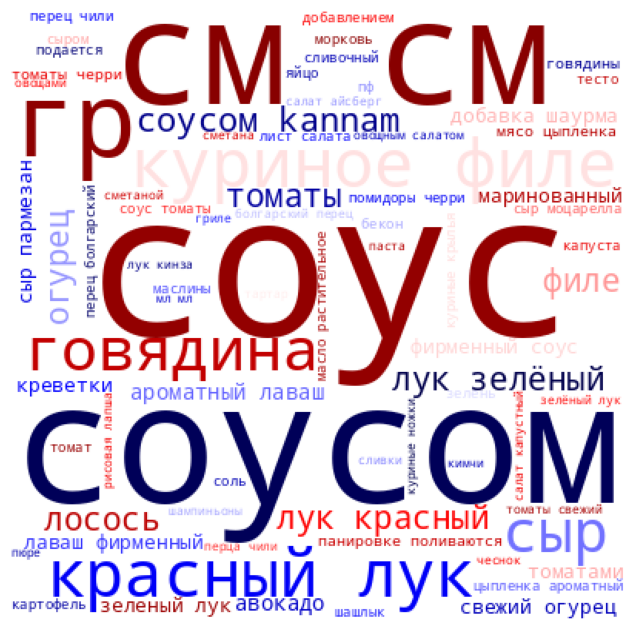

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

ingredients = []
for i in range(len(branch)):
    text = branch['ingredients'][i].split(',')
    text = ','.join(text)
    ingredients.append(text)

text = ' '.join(ingredients)

wordcloud = WordCloud(width=400, height=400, colormap='seismic', background_color='white', min_font_size=8).generate(text)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


In [ ]:
all_ingredients = [['–ª—É–∫'], ['–∞–≤–æ–∫–∞–¥–æ'], ['–∫—É—Ä–∏—Ü–∞'], ['—Å—ã—Ä'], ['–∫—Ä–µ–≤–µ—Ç–∫–∏'], ['–±–µ–∫–æ–Ω'], ['–æ–≥—É—Ä–µ—Ü']]


In [ ]:
new_column = pd.DataFrame(all_ingredients, columns=['ingredients'])

# –î–æ–±–∞–≤–ª–µ–Ω–∏–µ –Ω–æ–≤–æ–π –∫–æ–ª–æ–Ω–∫–∏ –≤ –∏—Å—Ö–æ–¥–Ω—ã–π –¥–∞—Ç–∞—Å–µ—Ç
branch['ingredients'] = new_column['ingredients']

# –ó–∞–ø–æ–ª–Ω–µ–Ω–∏–µ –ø—É—Å—Ç—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –≤ –∫–æ–ª–æ–Ω–∫–µ "ingredients" –Ω—É–ª—è–º–∏
branch['ingredients'].fillna(0, inplace=True)

In [ ]:
branch

id                       dish ingredients
0     70000001056052192     –®–∞—É—Ä–º–∞ "–ö–ª–∞—Å—Å–∏–∫–∞" –Ω–æ—Ä–º         –ª—É–∫
1     70000001056052192  –®–∞—É—Ä–º–∞ "–ö–ª–∞—Å—Å–∏–∫–∞" –±–æ–ª—å—à–∞—è     –∞–≤–æ–∫–∞–¥–æ
2     70000001056052192       –®–∞—É—Ä–º–∞ "–û—Å—Ç—Ä–∞—è" –Ω–æ—Ä–º      –∫—É—Ä–∏—Ü–∞
3     70000001056052192    –®–∞—É—Ä–º–∞ "–û—Å—Ç—Ä–∞—è" –±–æ–ª—å—à–∞—è         —Å—ã—Ä
4     70000001056052192      –®–∞—É—Ä–º–∞ "–ì—Ä–∏–±–Ω–∞—è" –Ω–æ—Ä–º    –∫—Ä–µ–≤–µ—Ç–∫–∏
...                 ...                        ...         ...
1213    422740746329503       –°—É–ø —Å—ã—Ä–Ω—ã–π —Å –≥—Ä–∏–±–∞–º–∏           0
1214    422740746329503               –ü–∏—Ü—Ü–∞ –ö–∞–Ω—Ç—Ä–∏           0
1215    422740746329503          –ú–æ–ª–æ—á–Ω—ã–π –∫–æ–∫—Ç–µ–π–ª—å           0
1216    422740746329503            –ö–µ—Å–∞–¥–∏—è –∫—É—Ä–∏–Ω–∞—è           0
1217    422740746329503                     –¶–µ–∑–∞—Ä—å           0

[1218 rows x 3 columns]

In [ ]:
for ingredient in all_ingredients:
    branch[ingredient] = 0

train_data = branch.copy()

In [ ]:
train_data.drop(['id','dish'], inplace=True, axis=1)
train_data['labels'] = train_data.iloc[:, 1:].values.tolist()
train_data.drop(train_data.columns.values[1:-1].tolist(), inplace=True, axis=1)
train_data.head()

ingredients              labels
0  –∞—Ä–æ–º–∞—Ç–Ω—ã–π –ª–∞–≤–∞—à –∫–∞–ø—É—Å—Ç–∞ –º–æ—Ä–∫–æ–≤—å —Å–≤–µ–∂–∏–π –æ–≥—É—Ä–µ—Ü ...  [0, 0, 0, 0, 0, 0]
1  –∞—Ä–æ–º–∞—Ç–Ω—ã–π –ª–∞–≤–∞—à –∫–∞–ø—É—Å—Ç–∞ –º–æ—Ä–∫–æ–≤—å —Å–≤–µ–∂–∏–π –æ–≥—É—Ä–µ—Ü ...  [0, 0, 0, 0, 0, 0]
2  —à–∞—É—Ä–º–∞ –∫–ª–∞—Å—Å–∏–∫–∞ –ø–µ—Ä–µ—Ü —Ö–∞–ª–∞–ø–µ–Ω—å–æ –æ—Å—Ç—Ä—ã–π —Å–æ—É—Å–ª—é–±...  [0, 0, 0, 0, 0, 0]
3  —à–∞—É—Ä–º–∞ –∫–ª–∞—Å—Å–∏–∫–∞ –ø–µ—Ä–µ—Ü —Ö–∞–ª–∞–ø–µ–Ω—å–æ –æ—Å—Ç—Ä—ã–π —Å–æ—É—Å–ª—é–±...  [0, 0, 0, 0, 0, 0]
4          —à–∞—É—Ä–º–∞ –∫–ª–∞—Å—Å–∏–∫–∞–∂–∞—Ä–µ–Ω—ã–µ –≥—Ä–∏–±—ã–ª—é–±–∞—è –¥–æ–±–∞–≤–∫–∞  [0, 0, 0, 0, 0, 0]

In [ ]:
train_data["ingredients"] = train_data["ingredients"].str.lower()
train_data["ingredients"] = train_data["ingredients"].str.replace("\xa0", " ", regex=False).str.split().str.join(" ")

In [ ]:
MAX_LEN = 512
TRAIN_BATCH_SIZE = 32
EPOCHS = 2
LEARNING_RATE = 1e-05
NUM_WORKERS = 1

In [ ]:
from torch.utils.data import Dataset


In [ ]:
pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch
class MultiLabelDataset(Dataset):

    def __init__(self, dataframe, tokenizer, max_len: int, eval_mode: bool = False):
        self.data = dataframe
        self.tokenizer = tokenizer
        self.text = dataframe.ingredients
        self.eval_mode = eval_mode
        if self.eval_mode is False:
            self.targets = self.data.labels
        self.max_len = max_len

    def __len__(self):
        return len(self.text)

    def __getitem__(self, index):
        text = str(self.text.iloc[index])
        text = " ".join(text.split())

        inputs = self.tokenizer.encode_plus(
            text,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            pad_to_max_length=True,
            return_token_type_ids=True
        )

        ids = inputs['input_ids']
        mask = inputs['attention_mask']
        token_type_ids = inputs["token_type_ids"]

        output = {
            'ids': torch.tensor(ids, dtype=torch.long),
            'mask': torch.tensor(mask, dtype=torch.long),
            'token_type_ids': torch.tensor(token_type_ids, dtype=torch.long),
        }

        if self.eval_mode is False:
            output['targets'] = torch.tensor(self.targets.iloc[index], dtype=torch.float)

        return output

In [ ]:
from transformers import DistilBertTokenizer

In [ ]:
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-multilingual-cased', truncation=True, do_lower_case=True)
training_set = MultiLabelDataset(train_data, tokenizer, MAX_LEN)

In [ ]:
training_set[0]

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


{'ids': tensor([   101,  40585,  27159,  10351,  11307,  10191,  26670,  77306,  56280,
         101012,  10367,    553,  87230,  10433,  10851,  25544,  14974,  10191,
            555,  15528, 110268,    553,  89887,  10316,    551,  44242,  12993,
          10956,  19954,    561,  23312,  14402,  11307,  10191,  97744,  28922,
          23668,  11307,  10191,    552,  20216,  11815,  19079,  13564,    102,
              0,      0,      0,      0,      0,      0,      0,      0,      0,
              0,      0,      0,      0,      0,      0,      0,      0,      0,
              0,      0,      0,      0,      0,      0,      0,      0,      0,
              0,      0,      0,      0,      0,      0,      0,      0,      0,
              0,      0,      0,      0,      0,      0,      0,      0,      0,
              0,      0,      0,      0,      0,      0,      0,      0,      0,
              0,      0,      0,      0,      0,      0,      0,      0,      0,
              0,     

In [ ]:
from torch.utils.data import DataLoader


In [ ]:
train_params = {'batch_size': TRAIN_BATCH_SIZE,
                'shuffle': True,
                'num_workers': NUM_WORKERS
                }
training_loader = DataLoader(training_set, **train_params)

In [ ]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, DistilBertModel

class DistilBERTClass(torch.nn.Module):

    def __init__(self):
        super(DistilBERTClass, self).__init__()
        self.l1 = DistilBertModel.from_pretrained("distilbert-base-multilingual-cased")
        self.pre_classifier = torch.nn.Linear(768, 768)
        self.dropout = torch.nn.Dropout(0.1)
        self.classifier = torch.nn.Linear(768, 6)

    def forward(self, input_ids, attention_mask, token_type_ids):
        output_1 = self.l1(input_ids=input_ids, attention_mask=attention_mask)
        hidden_state = output_1[0]
        pooler = hidden_state[:, 0]
        pooler = self.pre_classifier(pooler)
        pooler = torch.nn.Tanh()(pooler)
        pooler = self.dropout(pooler)
        output = self.classifier(pooler)
        return output


In [ ]:
import torch

# Check if GPU is available
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

In [ ]:
model = DistilBERTClass()
model.to(device)

Some weights of the model checkpoint at distilbert-base-multilingual-cased were not used when initializing DistilBertModel: ['vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


DistilBERTClass(
  (l1): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(119547, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
            (lin1): Linear(i

In [ ]:
def loss_fn(outputs, targets):
    return torch.nn.BCEWithLogitsLoss()(outputs, targets)

In [ ]:
optimizer = torch.optim.Adam(params =  model.parameters(), lr=LEARNING_RATE)

In [ ]:
from tqdm import tqdm


In [ ]:
pip install tqdm


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def train(epoch):

    model.train()
    for _,data in tqdm(enumerate(training_loader, 0)):
        ids = data['ids'].to(device, dtype = torch.long)
        mask = data['mask'].to(device, dtype = torch.long)
        token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
        targets = data['targets'].to(device, dtype = torch.float)

        outputs = model(ids, mask, token_type_ids)

        optimizer.zero_grad()
        loss = loss_fn(outputs, targets)
        if _%5000==0:
            print(f'Epoch: {epoch}, Loss:  {loss.item()}')

        loss.backward()
        optimizer.step()

In [ ]:
for epoch in range(EPOCHS):
    train(epoch)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2377: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
0it [00:00, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2377: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to 

In [ ]:
# all_ingredients = set()
# for ingredients in branch['ingredients']:
#     all_ingredients.update(ingredients)

# –°–æ–∑–¥–∞–Ω–∏–µ –≤–µ–∫—Ç–æ—Ä–æ–≤ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
# print(all_ingredients)
all_ingredients = [['–ª—É–∫'], ['–∞–≤–æ–∫–∞–¥–æ'], ['–∫—É—Ä–∏–Ω–æ–µ —Ñ–∏–ª–µ'], ['—Å—ã—Ä'], ['–∫—Ä–µ–≤–µ—Ç–∫–∏'], ['–±–µ–∫–æ–Ω'], ['—Å—ã—Ä']]
# –°–æ–∑–¥–∞–Ω–∏–µ –æ–±—ä–µ–∫—Ç–∞ MultiLabelBinarizer –∏ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏–µ –±–∏–Ω–∞—Ä–∏–∑–∞—Ü–∏–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
mlb = MultiLabelBinarizer()
features = mlb.fit_transform(all_ingredients)


# –°–æ–∑–¥–∞–Ω–∏–µ –Ω–æ–≤–æ–≥–æ DataFrame —Å –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏
features_df = pd.DataFrame(features, columns=mlb.classes_)

# –û–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å –∏—Å—Ö–æ–¥–Ω—ã–º –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–æ–º
branch_with_features = pd.concat([branch, features_df], axis=1)

In [ ]:
branch_with_features

id                       dish  \
0     70000001056052192     –®–∞—É—Ä–º–∞ "–ö–ª–∞—Å—Å–∏–∫–∞" –Ω–æ—Ä–º   
1     70000001056052192  –®–∞—É—Ä–º–∞ "–ö–ª–∞—Å—Å–∏–∫–∞" –±–æ–ª—å—à–∞—è   
2     70000001056052192       –®–∞—É—Ä–º–∞ "–û—Å—Ç—Ä–∞—è" –Ω–æ—Ä–º   
3     70000001056052192    –®–∞—É—Ä–º–∞ "–û—Å—Ç—Ä–∞—è" –±–æ–ª—å—à–∞—è   
4     70000001056052192      –®–∞—É—Ä–º–∞ "–ì—Ä–∏–±–Ω–∞—è" –Ω–æ—Ä–º   
...                 ...                        ...   
1214    422740746329503       –°—É–ø —Å—ã—Ä–Ω—ã–π —Å –≥—Ä–∏–±–∞–º–∏   
1215    422740746329503               –ü–∏—Ü—Ü–∞ –ö–∞–Ω—Ç—Ä–∏   
1216    422740746329503          –ú–æ–ª–æ—á–Ω—ã–π –∫–æ–∫—Ç–µ–π–ª—å   
1217    422740746329503            –ö–µ—Å–∞–¥–∏—è –∫—É—Ä–∏–Ω–∞—è   
1218    422740746329503                     –¶–µ–∑–∞—Ä—å   

                                            ingredients  –±–æ–±–æ–≤—ã–µ  –∑–ª–∞–∫–æ–≤—ã–µ  \
0     –ê—Ä–æ–º–∞—Ç–Ω—ã–π –ª–∞–≤–∞—à, –∫–∞–ø—É—Å—Ç–∞, –º–æ—Ä–∫–æ–≤—å, —Å–≤–µ–∂–∏–π –æ–≥—É—Ä...      0.0       0.0   
1     –ê—Ä–æ–º–∞—Ç–Ω—ã–π –ª–∞–≤–∞—à, –∫–∞–ø—É—Å—Ç–∞, –º–æ—Ä–∫–æ–≤—å, —Å–≤–µ–∂–∏–π –æ–≥—É—Ä...      0.0       0.0   
2     –®–∞—É—Ä–º–∞ "–ö–ª–∞—Å—Å–∏–∫–∞", –ø–µ—Ä–µ—Ü —Ö–∞–ª–∞–ø–µ–Ω—å–æ, –æ—Å—Ç—Ä—ã–π —Å–æ—É...      0.0       0.0   
3     –®–∞—É—Ä–º–∞ "–ö–ª–∞—Å—Å–∏–∫–∞", –ø–µ—Ä–µ—Ü —Ö–∞–ª–∞–ø–µ–Ω—å–æ, –æ—Å—Ç—Ä—ã–π —Å–æ—É...      1.0       0.0   
4         –®–∞—É—Ä–º–∞ "–ö–ª–∞—Å—Å–∏–∫–∞",–∂–∞—Ä–µ–Ω—ã–µ –≥—Ä–∏–±—ã,–ª—é–±–∞—è –¥–æ–±–∞–≤–∫–∞      0.0       0.0   
...                                                 ...      ...       ...   
1214  –°–æ—Å—Ç–∞–≤: –°—ã—Ä, –≥—Ä–∏–±—ã, –∫–∞—Ä—Ç–æ—Ñ–µ–ª—å, –ª—É–∫, —Å–ª–∏–≤–∫–∏, –∑–µ...      NaN       NaN   
1215  –°–æ—Å—Ç–∞–≤: –∫—É—Ä–∏—Ü–∞, –≤–µ—Ç—á–∏–Ω–∞, —Å—ã—Ä, –ø–æ–º–∏–¥–æ—Ä—ã, –º–∞—Å–ª–∏–Ω...      NaN       NaN   
1216  –ò–∑–≥–æ—Ç–∞–≤–ª–∏–≤–∞–µ—Ç—Å—è –Ω–∞ –æ—Å–Ω–æ–≤–µ –º–æ—Ä–æ–∂–µ–Ω–æ–≥–æ –∏ —Ñ–µ—Ä–º–µ—Ä—Å...      NaN       NaN   
1217  –°–æ—Å—Ç–∞–≤: –∫—É—Ä–∏—Ü–∞, –ø–æ–º–∏–¥–æ—Ä—ã, –ø–µ—Ä–µ—Ü –±–æ–ª–≥–∞—Ä—Å–∫–∏–π, —Å—ã...      NaN       NaN   
1218  –°–æ—Å—Ç–∞–≤: –∫—É—Ä–∏—Ü–∞, –ø–æ–º–∏–¥–æ—Ä—ã, —è–π—Ü–æ –ø–µ—Ä–µ–ø–µ–ª–∏–Ω–æ–µ, —Å—ã...      NaN       NaN   

      –ª—É–∫  –º–æ–ª–æ–∫–æ  –æ—Ä–µ—Ö–∏  —à–æ–∫–æ–ª–∞–¥  —è–π—Ü–∞  
0     0.0     0.0    0.0      0.0   1.0  
1     0.0     1.0    0.0      0.0   0.0  
2     0.0     0.0    1.0      0.0   0.0  
3     0.0     0.0    0.0      0.0   0.0  
4     0.0     0.0    0.0      1.0   0.0  
...   ...     ...    ...      ...   ...  
1214  NaN     NaN    NaN      NaN   NaN  
1215  NaN     NaN    NaN      NaN   NaN  
1216  NaN     NaN    NaN      NaN   NaN  
1217  NaN     NaN    NaN      NaN   NaN  
1218  NaN     NaN    NaN      NaN   NaN  

[1213 rows x 10 columns]

In [ ]:

branch_with_features.duplicated().sum()
branch.drop_duplicates(inplace=True)

branch_with_features.isnull().sum()
branch_with_features.dropna(how='any',inplace=True)

In [ ]:
branch_with_features

id                       dish  \
0  70000001056052192     –®–∞—É—Ä–º–∞ "–ö–ª–∞—Å—Å–∏–∫–∞" –Ω–æ—Ä–º   
1  70000001056052192  –®–∞—É—Ä–º–∞ "–ö–ª–∞—Å—Å–∏–∫–∞" –±–æ–ª—å—à–∞—è   
2  70000001056052192       –®–∞—É—Ä–º–∞ "–û—Å—Ç—Ä–∞—è" –Ω–æ—Ä–º   
3  70000001056052192    –®–∞—É—Ä–º–∞ "–û—Å—Ç—Ä–∞—è" –±–æ–ª—å—à–∞—è   
4  70000001056052192      –®–∞—É—Ä–º–∞ "–ì—Ä–∏–±–Ω–∞—è" –Ω–æ—Ä–º   
5  70000001056052192   –®–∞—É—Ä–º–∞ "–ì—Ä–∏–±–Ω–∞—è" –±–æ–ª—å—à–∞—è   
6  70000001056052192       –®–∞—É—Ä–º–∞ "–°—ã—Ä–Ω–∞—è" –Ω–æ—Ä–º   

                                         ingredients  –±–æ–±–æ–≤—ã–µ  –∑–ª–∞–∫–æ–≤—ã–µ  –ª—É–∫  \
0  –ê—Ä–æ–º–∞—Ç–Ω—ã–π –ª–∞–≤–∞—à, –∫–∞–ø—É—Å—Ç–∞, –º–æ—Ä–∫–æ–≤—å, —Å–≤–µ–∂–∏–π –æ–≥—É—Ä...      0.0       0.0  0.0   
1  –ê—Ä–æ–º–∞—Ç–Ω—ã–π –ª–∞–≤–∞—à, –∫–∞–ø—É—Å—Ç–∞, –º–æ—Ä–∫–æ–≤—å, —Å–≤–µ–∂–∏–π –æ–≥—É—Ä...      0.0       0.0  0.0   
2  –®–∞—É—Ä–º–∞ "–ö–ª–∞—Å—Å–∏–∫–∞", –ø–µ—Ä–µ—Ü —Ö–∞–ª–∞–ø–µ–Ω—å–æ, –æ—Å—Ç—Ä—ã–π —Å–æ—É...      0.0       0.0  0.0   
3  –®–∞—É—Ä–º–∞ "–ö–ª–∞—Å—Å–∏–∫–∞", –ø–µ—Ä–µ—Ü —Ö–∞–ª–∞–ø–µ–Ω—å–æ, –æ—Å—Ç—Ä—ã–π —Å–æ—É...      1.0       0.0  0.0   
4      –®–∞—É—Ä–º–∞ "–ö–ª–∞—Å—Å–∏–∫–∞",–∂–∞—Ä–µ–Ω—ã–µ –≥—Ä–∏–±—ã,–ª—é–±–∞—è –¥–æ–±–∞–≤–∫–∞      0.0       0.0  0.0   
5      –®–∞—É—Ä–º–∞ "–ö–ª–∞—Å—Å–∏–∫–∞",–∂–∞—Ä–µ–Ω—ã–µ –≥—Ä–∏–±—ã,–ª—é–±–∞—è –¥–æ–±–∞–≤–∫–∞      0.0       1.0  0.0   
6  –®–∞—É—Ä–º–∞ "–ö–ª–∞—Å—Å–∏–∫–∞", —Å—ã—Ä –º–æ—Ü–∞—Ä–µ–ª–ª–∞,—Å—ã—Ä–Ω—ã–π —Å–æ—É—Å,–ª...      0.0       0.0  1.0   

   –º–æ–ª–æ–∫–æ  –æ—Ä–µ—Ö–∏  —à–æ–∫–æ–ª–∞–¥  —è–π—Ü–∞  
0     0.0    0.0      0.0   1.0  
1     1.0    0.0      0.0   0.0  
2     0.0    1.0      0.0   0.0  
3     0.0    0.0      0.0   0.0  
4     0.0    0.0      1.0   0.0  
5     0.0    0.0      0.0   0.0  
6     0.0    0.0      0.0   0.0

In [ ]:
branches_dishes_ingredients = pd.DataFrame({'id', 'dish', 'ingredients'})
branch_dishes = df2
i = 0
for branch_id in branch_dishes['id']:
  dishes = branch_dishes['dishes'][i]
  ingredients = branch_dishes['description'][i]
  for j in range(len(dishes)):
    dish = dishes[j]
    dish_ingredients = ingredients[j].replace('+', ',')
    dish_ingredients = dish_ingredients.replace('\n', '')
    record = pd.DataFrame({'id': branch_id, 'dish': dish, 'ingredients': dish_ingredients})
    branches_dishes_ingredients = branches_dishes_ingredients.append(record, ignore_index=True)
    print(record)
    i = i + 1

branches_dishes_ingredients

ValueError: ignored